# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, KFold
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.neural_network import MLPClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Pipeline
from sklearn.pipeline import Pipeline

# Explainable AI
import shap

# Understanding Data

## Missing Value and Loading Data
Before loading data, the data has been taken to google sheet. Then By find and replace, we replaced "N/A", "not found", "na", "-" in "Match entire cell element" option replaced with "". Then we loaded the dataset. It helped making all those Nan values in one format. Since those were strings the column's datatype was showing Object. After handling by that technique, the columns are automatically formatted with correct datatype.

In [3]:
df = pd.read_csv('/kaggle/input/codon-usage-dataset-partially-cleaned/train_replaced_missing_values.csv')
df.head()

sample_id  dnatype section class infraclass cohort superorder parvorder  \
0     942441      0.0     NaN   NaN        NaN    NaN        NaN       NaN   
1     945052      0.0     NaN   NaN        NaN    NaN        NaN       NaN   
2     942010      0.0     NaN   NaN        NaN    NaN        NaN       NaN   
3     946679      0.0     NaN   NaN        NaN    NaN        NaN       NaN   
4     945046      0.0     NaN   NaN        NaN    NaN        NaN       NaN   

  infraorder superclass  ...  subspecies species subgroup subclass  tribe  \
0        NaN        NaN  ...         NaN              NaN      NaN    NaN   
1        NaN        NaN  ...         NaN              NaN      NaN    NaN   
2        NaN        NaN  ...         NaN              NaN      NaN    NaN   
3        NaN        NaN  ...         NaN              NaN      NaN    NaN   
4        NaN        NaN  ...         NaN              NaN      NaN    NaN   

   subtribe  morph  forma  subsection forma specialis varietas  
0       NaN    NaN    NaN         NaN             NaN      NaN  
1       NaN    NaN    NaN         NaN             NaN      NaN  
2       NaN    NaN    NaN         NaN             NaN      NaN  
3       NaN    NaN    NaN         NaN             NaN      NaN  
4       NaN    NaN    NaN         NaN             NaN      NaN  

[5 rows x 114 columns]

In [4]:
df.shape

(9771, 114)

In [5]:
df.describe()

sample_id      dnatype  superphylum  biotype  pathogroup  series  \
count    9771.000000  7987.000000          0.0      0.0         0.0     0.0   
mean   946020.800123     0.371729          NaN      NaN         NaN     NaN   
std      3745.327500     0.723071          NaN      NaN         NaN     NaN   
min    939524.000000     0.000000          NaN      NaN         NaN     NaN   
25%    942795.000000     0.000000          NaN      NaN         NaN     NaN   
50%    946008.000000     0.000000          NaN      NaN         NaN     NaN   
75%    949255.000000     1.000000          NaN      NaN         NaN     NaN   
max    952551.000000    12.000000          NaN      NaN         NaN     NaN   

           speciesid       ncodons          uuc          uua  ...  \
count    7865.000000  7.929000e+03  8012.000000  8042.000000  ...   
mean   131720.028353  7.743581e+04     0.023398     0.020811  ...   
std    125437.836379  6.833001e+05     0.011520     0.020594  ...   
min        14.000000  1.000000e+03     0.000000     0.000000  ...   
25%     28948.000000  1.579000e+03     0.015470     0.005800  ...   
50%     83556.000000  2.905000e+03     0.021700     0.015415  ...   
75%    223338.000000  9.011000e+03     0.029062     0.029935  ...   
max    463521.000000  4.066258e+07     0.076120     0.141130  ...   

               gaa          gag          uaa          uag          uga  \
count  7770.000000  7800.000000  7968.000000  8021.000000  7902.000000   
mean      0.028330     0.021680     0.001633     0.000593     0.006074   
std       0.014386     0.014993     0.001812     0.000916     0.010253   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.017380     0.009780     0.000560     0.000000     0.000400   
50%       0.026065     0.020485     0.001350     0.000420     0.001130   
75%       0.036897     0.030980     0.002350     0.000830     0.002830   
max       0.144890     0.113060     0.045200     0.024730     0.106700   

       genotype  isolate  morph  forma  subsection  
count       0.0      0.0    0.0    0.0         0.0  
mean        NaN      NaN    NaN    NaN         NaN  
std         NaN      NaN    NaN    NaN         NaN  
min         NaN      NaN    NaN    NaN         NaN  
25%         NaN      NaN    NaN    NaN         NaN  
50%         NaN      NaN    NaN    NaN         NaN  
75%         NaN      NaN    NaN    NaN         NaN  
max         NaN      NaN    NaN    NaN         NaN  

[8 rows x 76 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Columns: 114 entries, sample_id to varietas
dtypes: float64(75), int64(1), object(38)
memory usage: 8.5+ MB


### To see all column's values
- We can use for loop to see all
- We can use print and list format. However it will only show the listed value of those columns.

In [7]:
missing_values = df.isnull().sum()
data_types = df.dtypes

# Now you can print or explore 'missing_values' and 'data_types' variables
print(list(missing_values))

[0, 1784, 9770, 8720, 9709, 9692, 9673, 9755, 9703, 9681, 9771, 9767, 9770, 9771, 9771, 9771, 1906, 1842, 1892, 8618, 8808, 8925, 9706, 8833, 9444, 0, 1811, 1759, 1729, 1810, 1930, 1871, 1589, 1760, 1711, 1655, 1886, 1633, 1817, 1818, 1756, 1970, 1873, 1811, 1814, 1689, 1844, 1743, 1622, 1802, 1685, 1783, 1808, 1694, 1965, 2035, 1842, 1731, 1778, 1819, 1669, 1890, 2007, 1536, 1646, 1869, 1528, 1822, 1883, 1947, 1782, 1802, 1907, 1826, 1897, 1743, 1628, 1571, 1885, 1956, 1876, 1783, 1692, 1531, 1800, 2001, 1971, 1803, 1750, 1869, 8807, 9692, 8631, 9420, 8623, 8603, 9705, 9726, 9612, 9771, 9771, 9707, 9684, 8467, 9734, 9761, 9521, 9669, 9751, 9771, 9771, 9771, 9767, 9764]


In [8]:
print(list(df.columns))

['sample_id', 'dnatype', 'section', 'class', 'infraclass', 'cohort', 'superorder', 'parvorder', 'infraorder', 'superclass', 'superphylum', 'subcohort', 'serogroup', 'biotype', 'pathogroup', 'series', 'speciesid', 'ncodons', 'speciesname', 'superkingdom', 'clade', 'kingdom', 'subkingdom', 'family', 'subfamily', 'type', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga', 'no rank', 'superfamily', 'phylum', 'subphylum', 'order', 'genus', 'subgenus', 'serotype', 'suborder', 'genotype', 'isolate', 'strain', 'species group', 'species', 'subspecies', 'species subgroup', 'subclass', 'tribe', 'subtribe', '

In [9]:
print(list(df.dtypes))

[dtype('int64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),

# Data Cleaning

## Duplicate Data Handling

In [10]:
# Drop Duplicate Rows
df = df.drop_duplicates()
print(df.shape)

(9771, 114)


In [11]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

## Exploratory Data Analysis

### Missing Values Check

48.415199291853625


<Axes: >

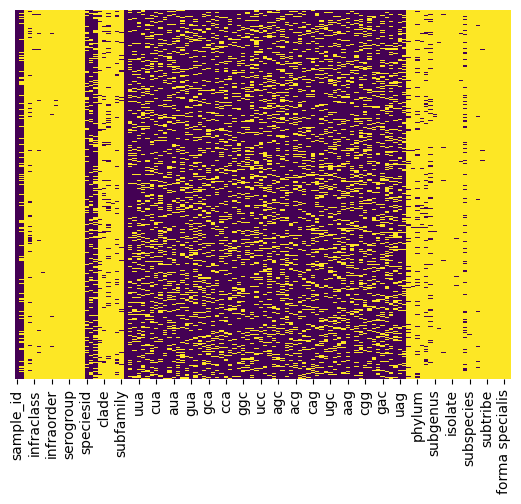

In [12]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Separate integer columns
int_cols = df.select_dtypes(include=['int']).columns.tolist()

# Separate float columns
float_cols = df.select_dtypes(include=['float']).columns.tolist()

# Separate categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Integer columns:", int_cols)
print("Float columns:", float_cols)
print("Categorical columns:", cat_cols)

Integer columns: ['sample_id']
Float columns: ['dnatype', 'superphylum', 'biotype', 'pathogroup', 'series', 'speciesid', 'ncodons', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga', 'genotype', 'isolate', 'morph', 'forma', 'subsection']
Categorical columns: ['section', 'class', 'infraclass', 'cohort', 'superorder', 'parvorder', 'infraorder', 'superclass', 'subcohort', 'serogroup', 'speciesname', 'superkingdom', 'clade', 'kingdom', 'subkingdom', 'family', 'subfamily', 'type', 'uuu', 'no rank', 'superfamily', 'phylum', 'subphylum', 'order', 'genus', 'subgenus', 'serotype', 'suborder', 'strain', 'species 

#### Integer Column Univariate Analysis

Column: sample_id
Summary Statistics:
count      9771.000000
mean     946020.800123
std        3745.327500
min      939524.000000
25%      942795.000000
50%      946008.000000
75%      949255.000000
max      952551.000000
Name: sample_id, dtype: float64


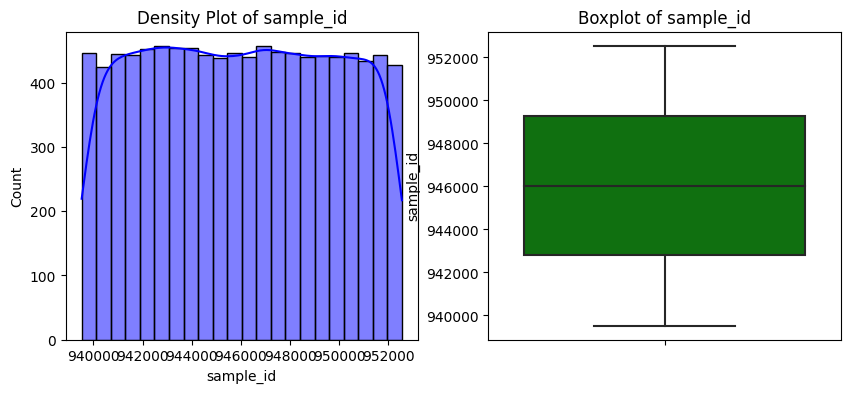

In [14]:
# Plot density plot and histogram for integer columns
for col in int_cols:
    print("Column:", col)
    print("Summary Statistics:")
    print(df[col].describe())
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Density Plot of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Float Column Univariate Analysis

Column: dnatype
Summary Statistics:
count    7987.000000
mean        0.371729
std         0.723071
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: dnatype, dtype: float64


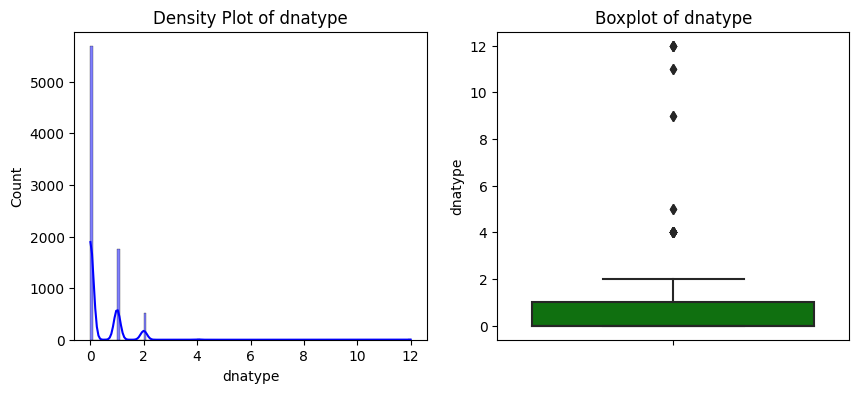

Column: superphylum
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: superphylum, dtype: float64


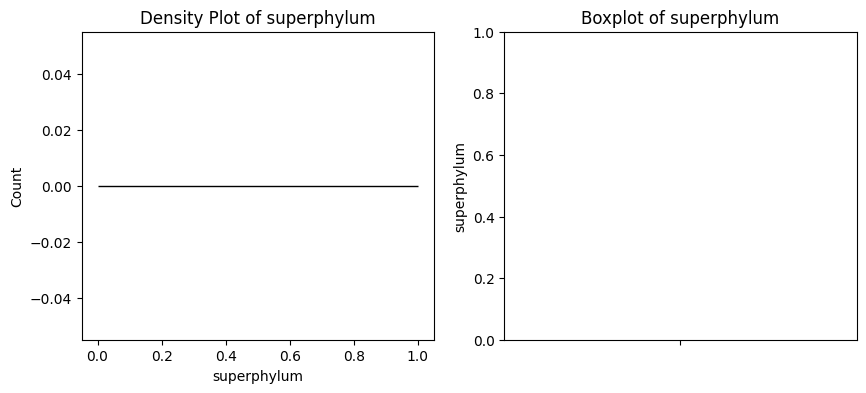

Column: biotype
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: biotype, dtype: float64


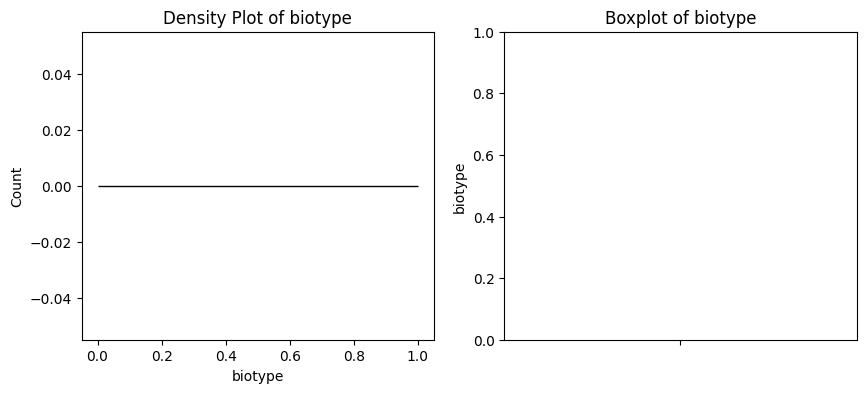

Column: pathogroup
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pathogroup, dtype: float64


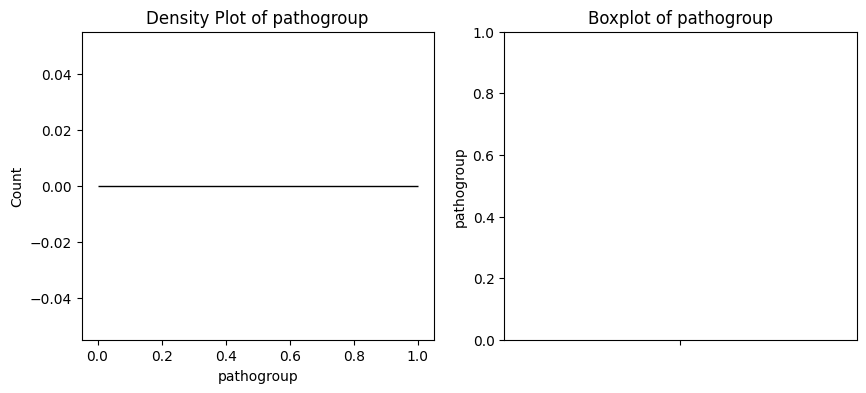

Column: series
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: series, dtype: float64


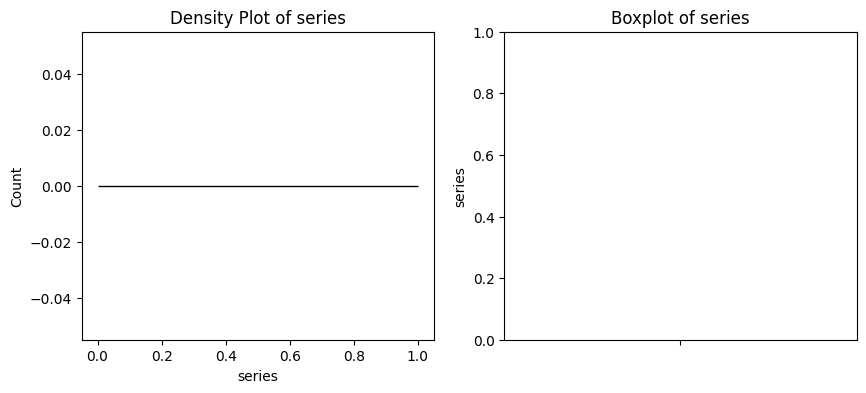

Column: speciesid
Summary Statistics:
count      7865.000000
mean     131720.028353
std      125437.836379
min          14.000000
25%       28948.000000
50%       83556.000000
75%      223338.000000
max      463521.000000
Name: speciesid, dtype: float64


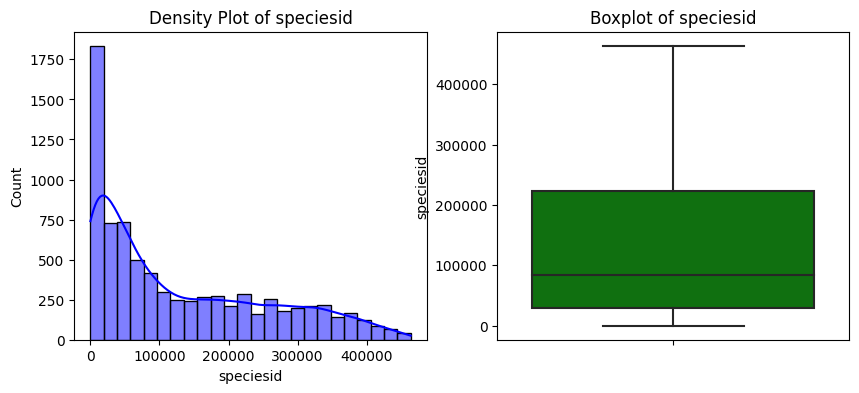

Column: ncodons
Summary Statistics:
count    7.929000e+03
mean     7.743581e+04
std      6.833001e+05
min      1.000000e+03
25%      1.579000e+03
50%      2.905000e+03
75%      9.011000e+03
max      4.066258e+07
Name: ncodons, dtype: float64


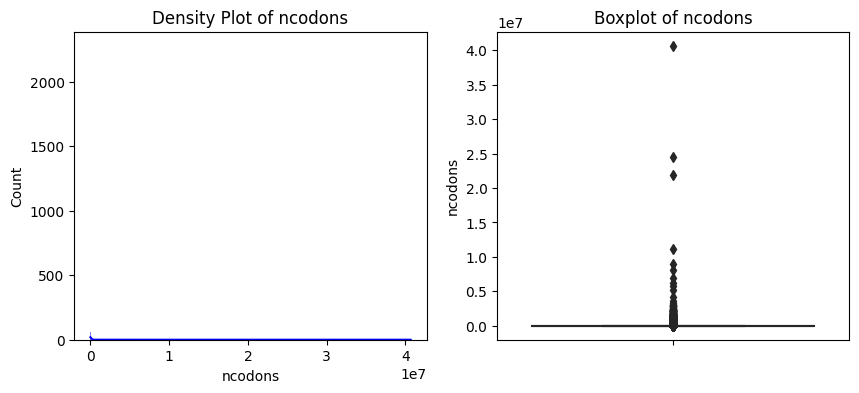

Column: uuc
Summary Statistics:
count    8012.000000
mean        0.023398
std         0.011520
min         0.000000
25%         0.015470
50%         0.021700
75%         0.029062
max         0.076120
Name: uuc, dtype: float64


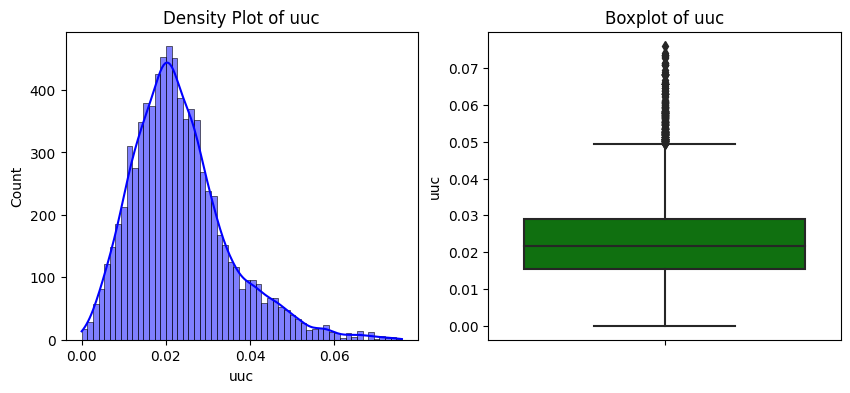

Column: uua
Summary Statistics:
count    8042.000000
mean        0.020811
std         0.020594
min         0.000000
25%         0.005800
50%         0.015415
75%         0.029935
max         0.141130
Name: uua, dtype: float64


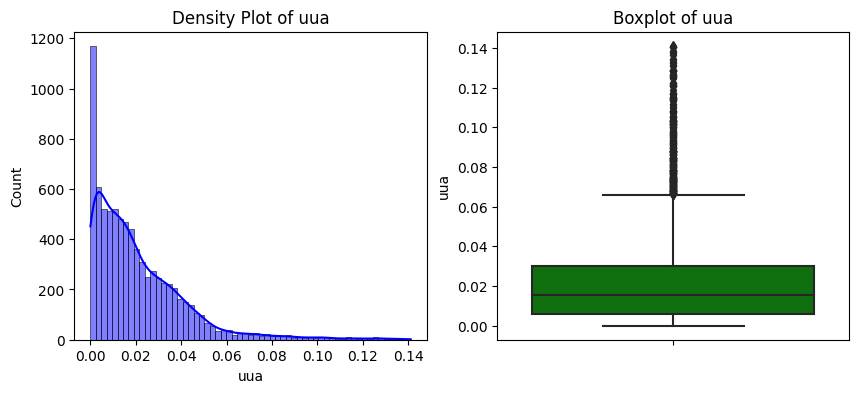

Column: uug
Summary Statistics:
count    7961.000000
mean        0.014154
std         0.009294
min         0.000000
25%         0.007200
50%         0.013450
75%         0.019800
max         0.101190
Name: uug, dtype: float64


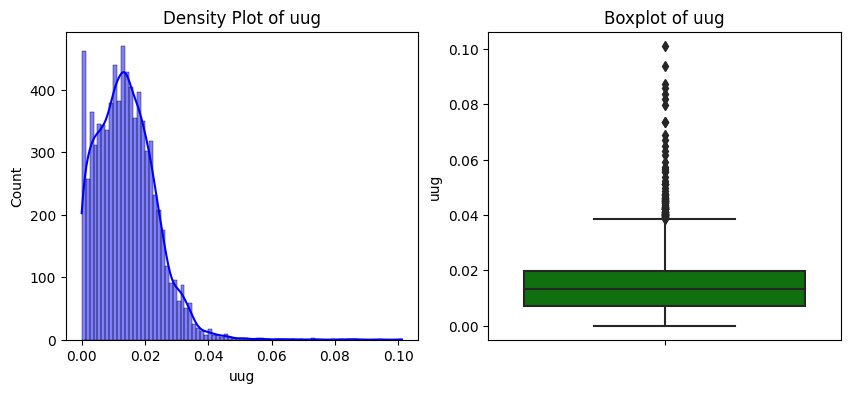

Column: cuu
Summary Statistics:
count    7841.000000
mean        0.017829
std         0.010470
min         0.000000
25%         0.010930
50%         0.016170
75%         0.022800
max         0.089780
Name: cuu, dtype: float64


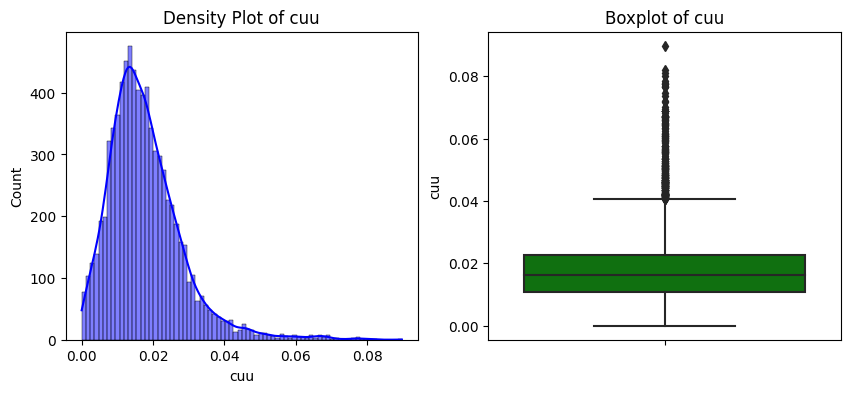

Column: cuc
Summary Statistics:
count    7900.000000
mean        0.018106
std         0.014495
min         0.000000
25%         0.007860
50%         0.014310
75%         0.024810
max         0.098470
Name: cuc, dtype: float64


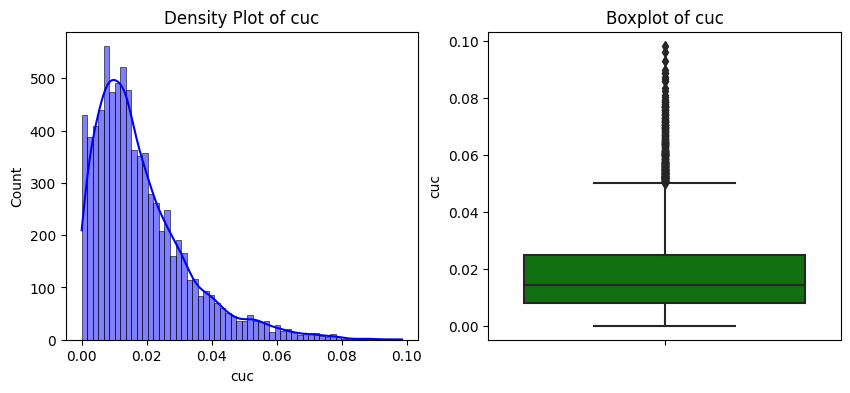

Column: cua
Summary Statistics:
count    8182.000000
mean        0.018953
std         0.024295
min         0.000000
25%         0.005293
50%         0.009770
75%         0.016828
max         0.163920
Name: cua, dtype: float64


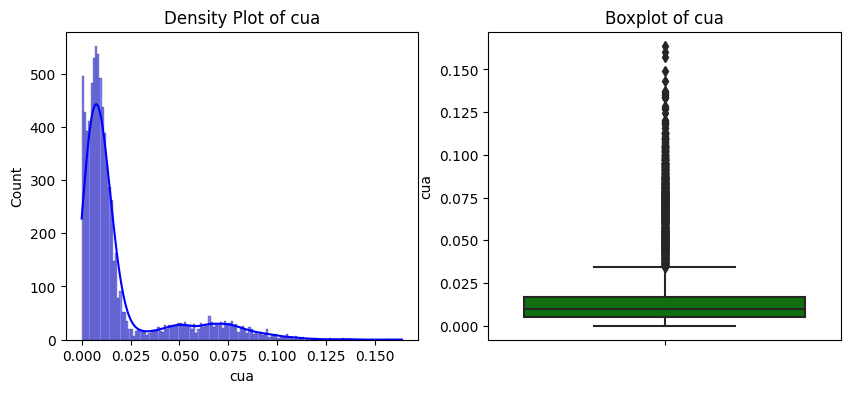

Column: cug
Summary Statistics:
count    8011.000000
mean        0.018584
std         0.016712
min         0.000000
25%         0.007230
50%         0.012890
75%         0.024555
max         0.107370
Name: cug, dtype: float64


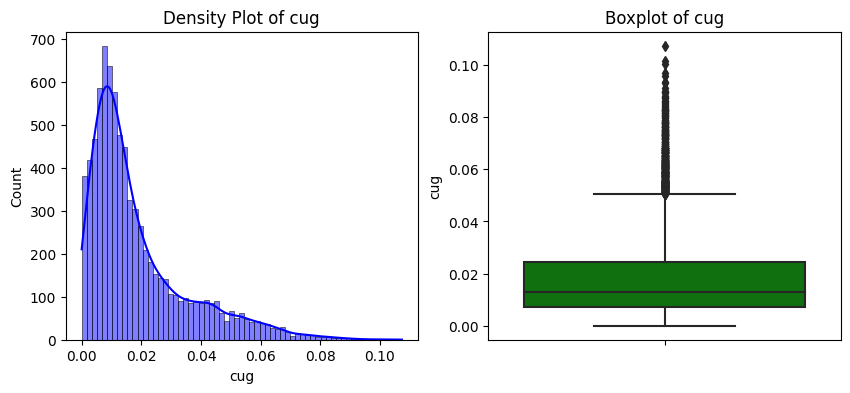

Column: auu
Summary Statistics:
count    8060.000000
mean        0.028518
std         0.017401
min         0.000000
25%         0.016567
50%         0.025710
75%         0.038453
max         0.154060
Name: auu, dtype: float64


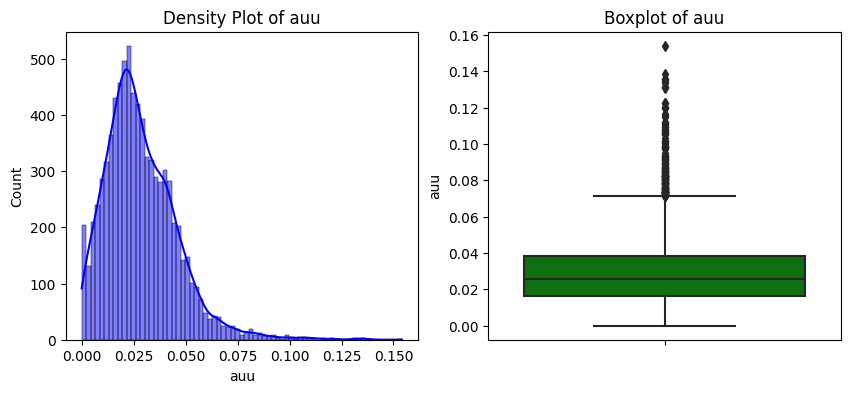

Column: auc
Summary Statistics:
count    8116.000000
mean        0.025120
std         0.014609
min         0.000000
25%         0.015140
50%         0.021510
75%         0.031900
max         0.087830
Name: auc, dtype: float64


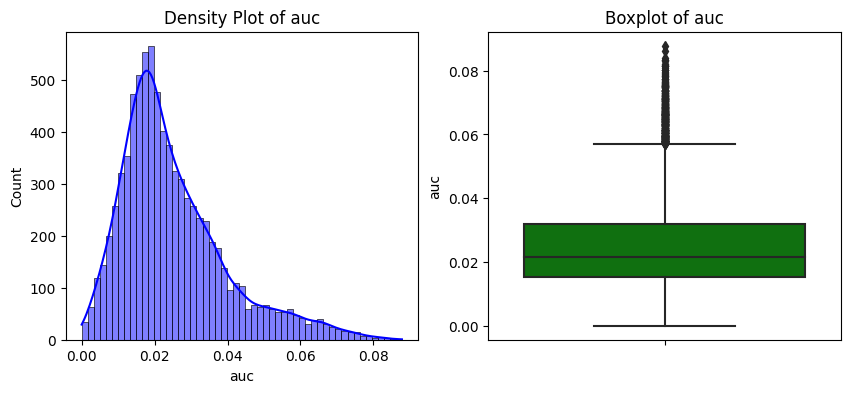

Column: aua
Summary Statistics:
count    7885.000000
mean        0.018320
std         0.016103
min         0.000000
25%         0.006230
50%         0.014150
75%         0.026000
max         0.134400
Name: aua, dtype: float64


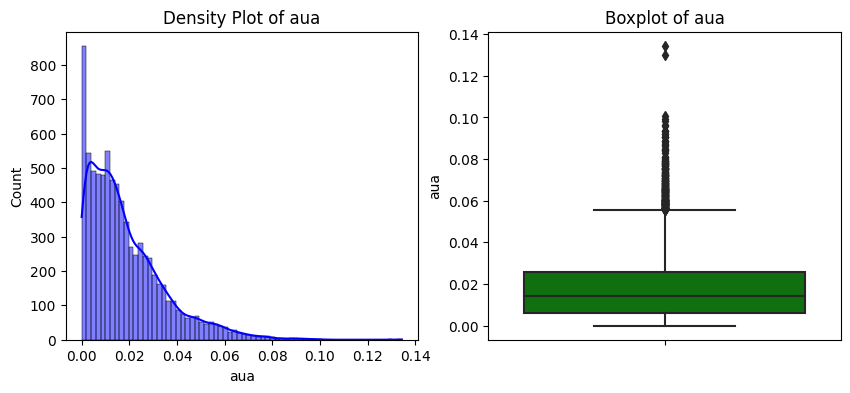

Column: aug
Summary Statistics:
count    8138.000000
mean        0.021159
std         0.008116
min         0.000000
25%         0.015912
50%         0.021980
75%         0.026280
max         0.101690
Name: aug, dtype: float64


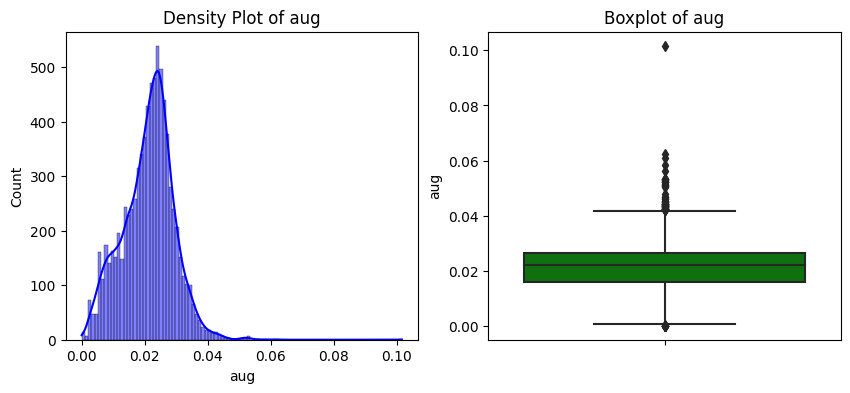

Column: guu
Summary Statistics:
count    7954.000000
mean        0.017620
std         0.009916
min         0.000000
25%         0.010530
50%         0.017115
75%         0.023500
max         0.111110
Name: guu, dtype: float64


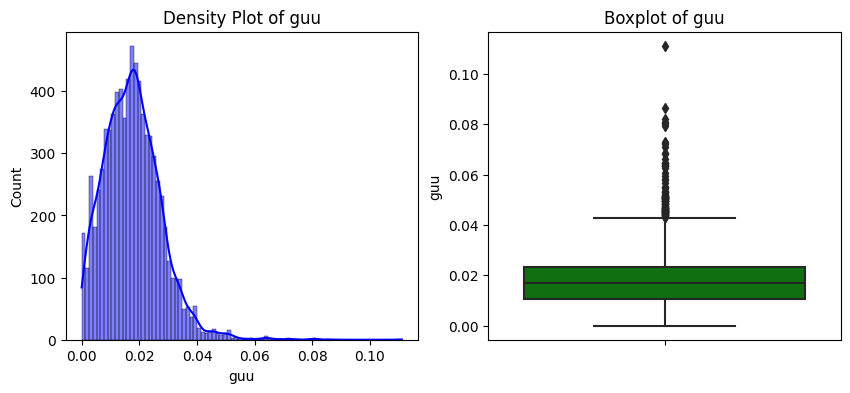

Column: guc
Summary Statistics:
count    7953.000000
mean        0.015086
std         0.009881
min         0.000000
25%         0.008300
50%         0.013160
75%         0.019360
max         0.121900
Name: guc, dtype: float64


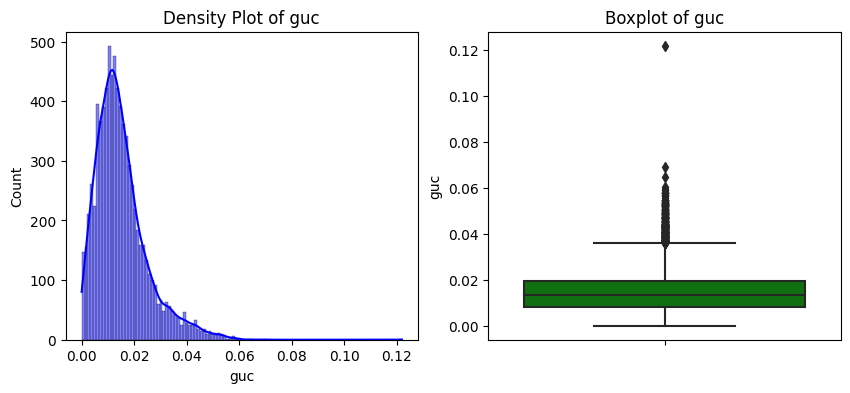

Column: gua
Summary Statistics:
count    8015.000000
mean        0.013676
std         0.008339
min         0.000000
25%         0.006970
50%         0.012670
75%         0.019230
max         0.064290
Name: gua, dtype: float64


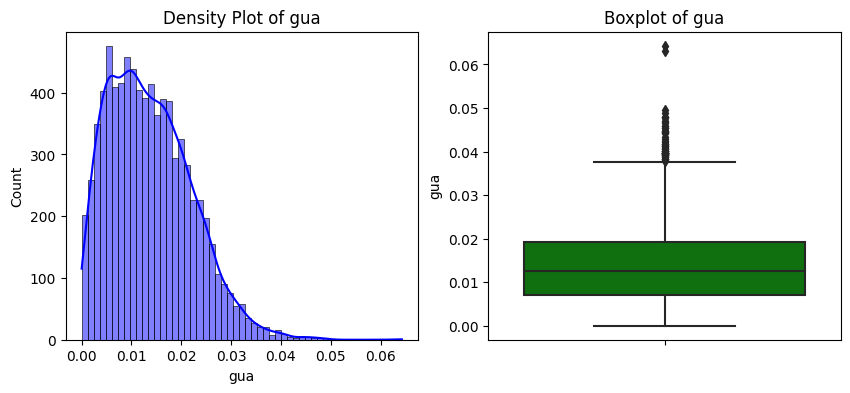

Column: gug
Summary Statistics:
count    7801.000000
mean        0.016552
std         0.011800
min         0.000000
25%         0.007000
50%         0.014630
75%         0.024130
max         0.092490
Name: gug, dtype: float64


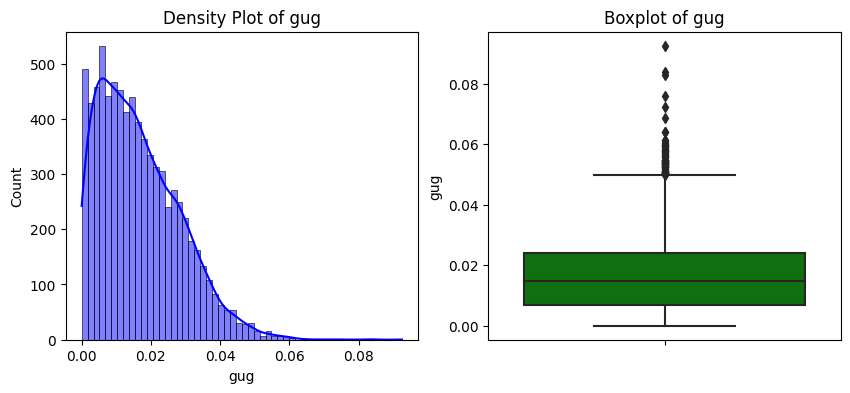

Column: gcu
Summary Statistics:
count    7898.000000
mean        0.019963
std         0.009956
min         0.000000
25%         0.013362
50%         0.018725
75%         0.025118
max         0.107820
Name: gcu, dtype: float64


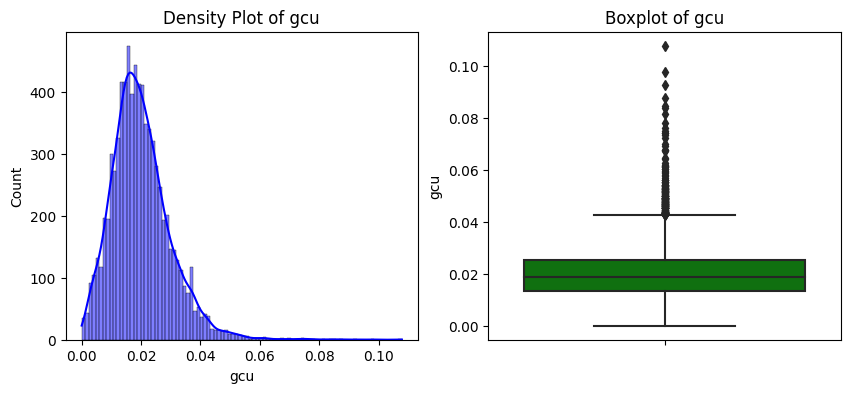

Column: gcc
Summary Statistics:
count    7960.000000
mean        0.023626
std         0.017021
min         0.000000
25%         0.010340
50%         0.020045
75%         0.033305
max         0.122840
Name: gcc, dtype: float64


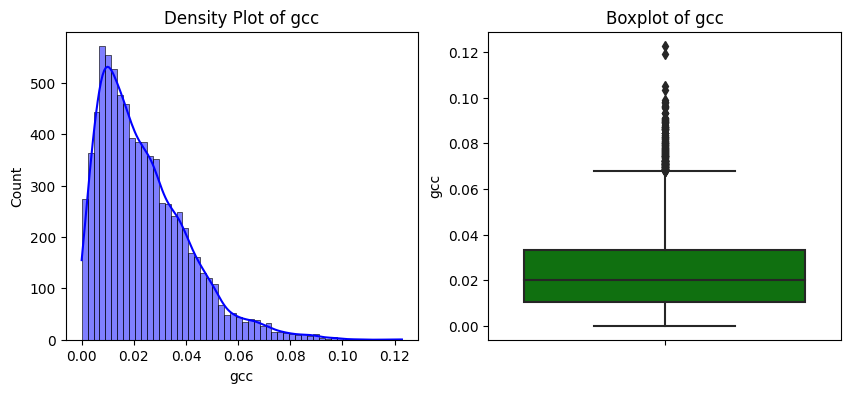

Column: gca
Summary Statistics:
count    7957.000000
mean        0.019042
std         0.009290
min         0.000000
25%         0.012950
50%         0.018600
75%         0.024450
max         0.197120
Name: gca, dtype: float64


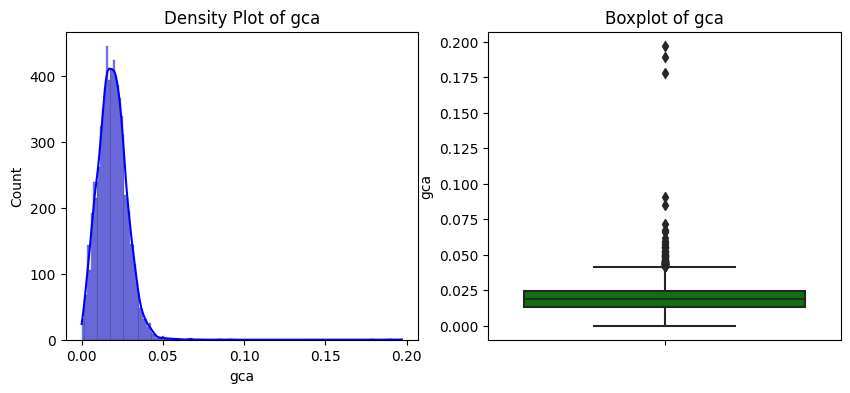

Column: gcg
Summary Statistics:
count    8082.000000
mean        0.011665
std         0.013461
min         0.000000
25%         0.002960
50%         0.007095
75%         0.014388
max         0.100310
Name: gcg, dtype: float64


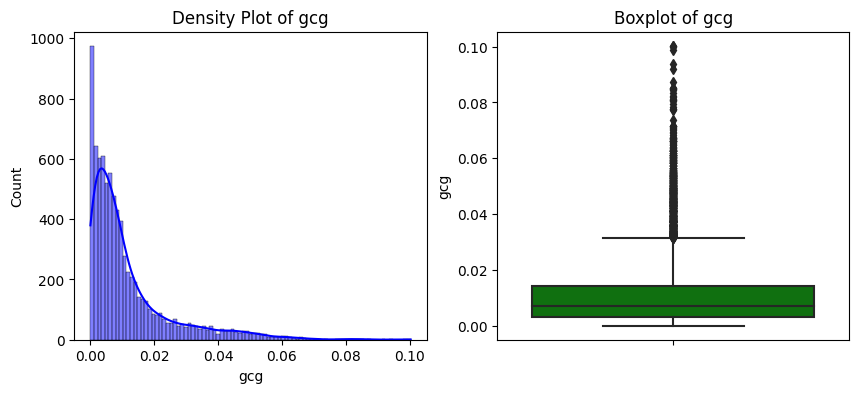

Column: ccu
Summary Statistics:
count    7927.000000
mean        0.012952
std         0.006768
min         0.000000
25%         0.008440
50%         0.012370
75%         0.016855
max         0.087250
Name: ccu, dtype: float64


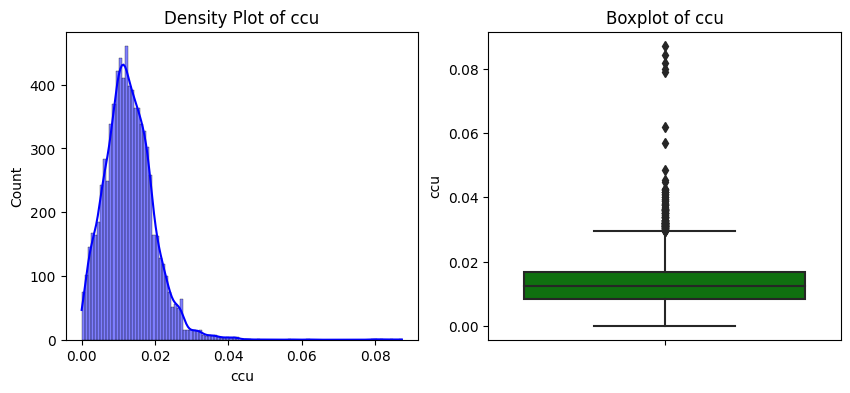

Column: ccc
Summary Statistics:
count    8028.000000
mean        0.012575
std         0.009051
min         0.000000
25%         0.005690
50%         0.010995
75%         0.017610
max         0.101550
Name: ccc, dtype: float64


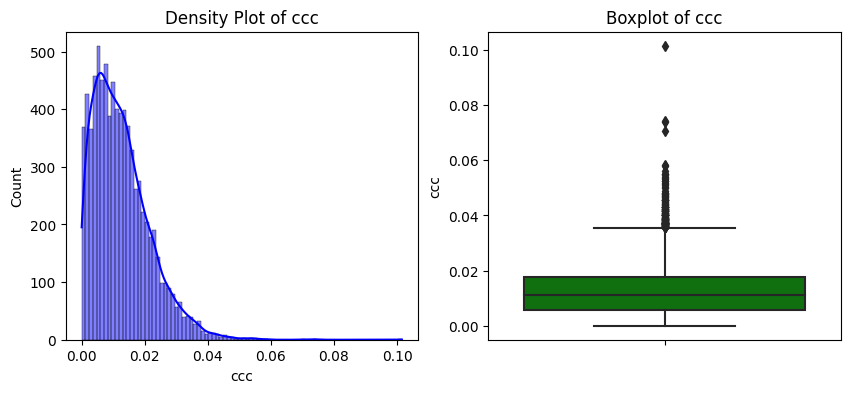

Column: cca
Summary Statistics:
count    8149.000000
mean        0.015699
std         0.009649
min         0.000000
25%         0.009130
50%         0.014340
75%         0.020400
max         0.124150
Name: cca, dtype: float64


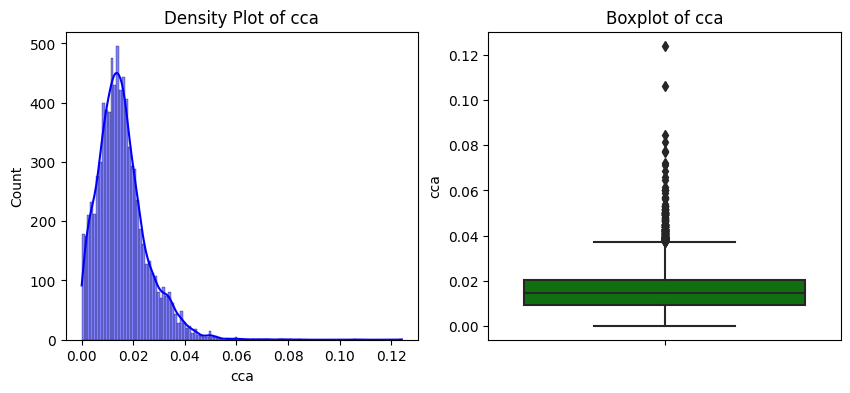

Column: ccg
Summary Statistics:
count    7969.000000
mean        0.008548
std         0.008863
min         0.000000
25%         0.002550
50%         0.005730
75%         0.010930
max         0.057720
Name: ccg, dtype: float64


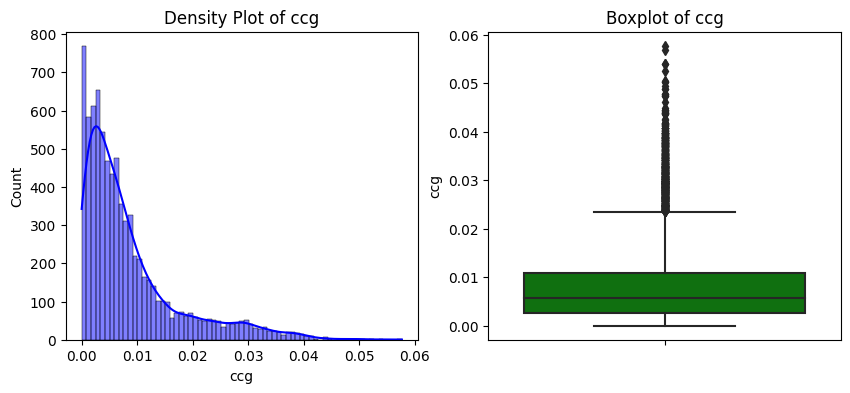

Column: ugg
Summary Statistics:
count    8086.000000
mean        0.011640
std         0.006538
min         0.000000
25%         0.007213
50%         0.012040
75%         0.015397
max         0.083820
Name: ugg, dtype: float64


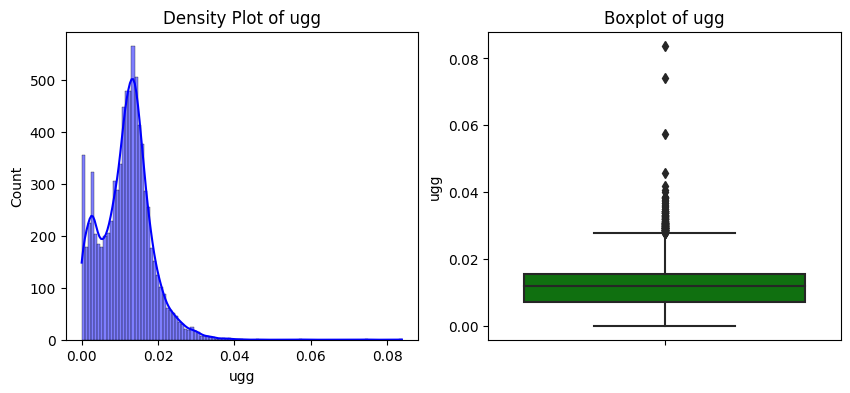

Column: ggu
Summary Statistics:
count    7988.000000
mean        0.017321
std         0.010519
min         0.000000
25%         0.010190
50%         0.015630
75%         0.022520
max         0.111870
Name: ggu, dtype: float64


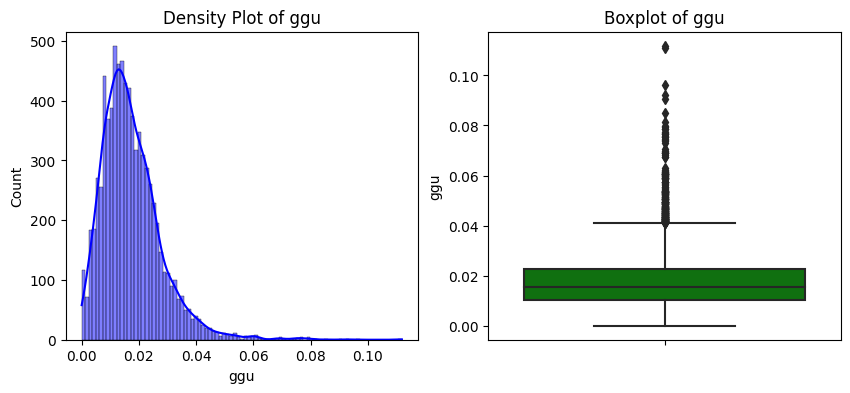

Column: ggc
Summary Statistics:
count    7963.000000
mean        0.019102
std         0.014787
min         0.000000
25%         0.009030
50%         0.015470
75%         0.024030
max         0.103100
Name: ggc, dtype: float64


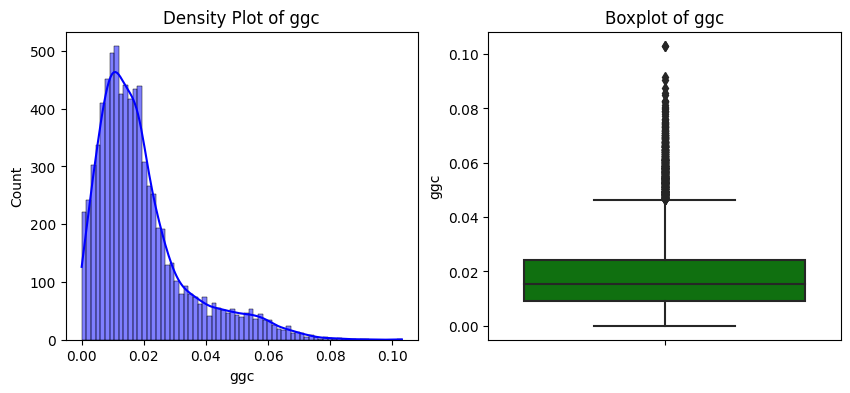

Column: gga
Summary Statistics:
count    8077.000000
mean        0.018324
std         0.009235
min         0.000000
25%         0.011870
50%         0.017450
75%         0.023630
max         0.135030
Name: gga, dtype: float64


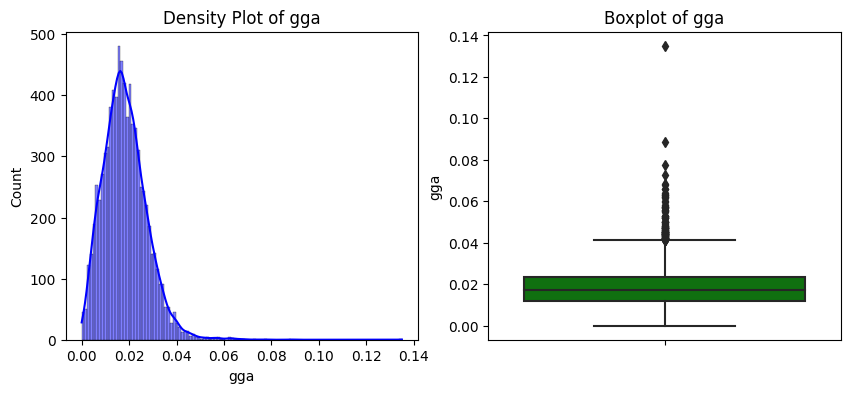

Column: ggg
Summary Statistics:
count    7806.000000
mean        0.010631
std         0.007314
min         0.000000
25%         0.005640
50%         0.009785
75%         0.014060
max         0.121260
Name: ggg, dtype: float64


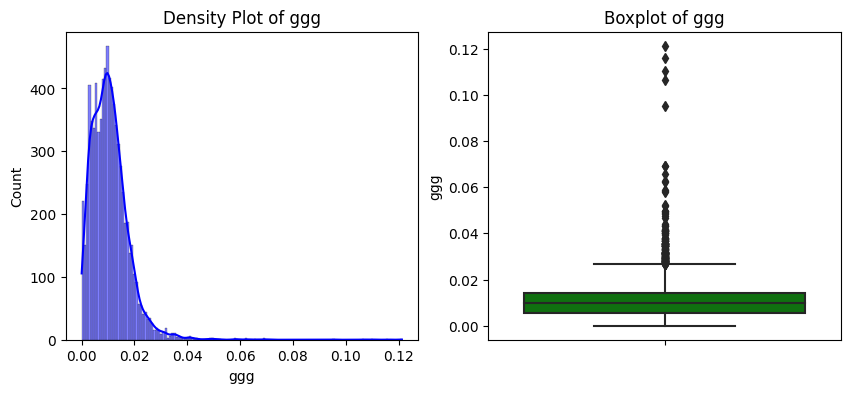

Column: ucu
Summary Statistics:
count    7736.000000
mean        0.014823
std         0.009013
min         0.000000
25%         0.008680
50%         0.013830
75%         0.019170
max         0.069760
Name: ucu, dtype: float64


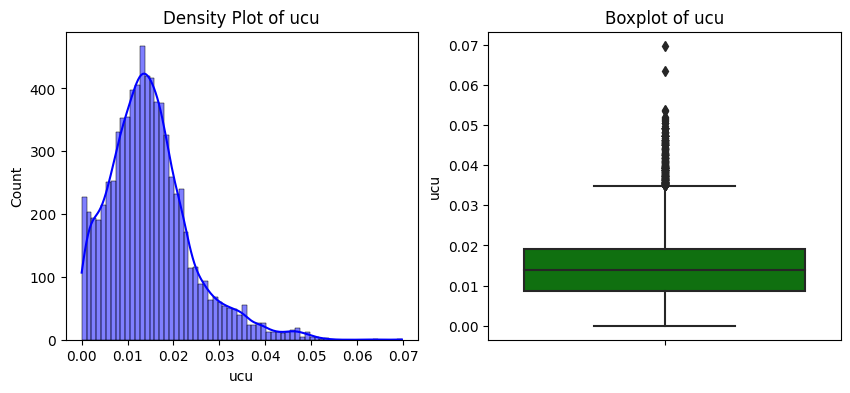

Column: ucc
Summary Statistics:
count    7929.000000
mean        0.013190
std         0.007512
min         0.000000
25%         0.007820
50%         0.012410
75%         0.017440
max         0.076740
Name: ucc, dtype: float64


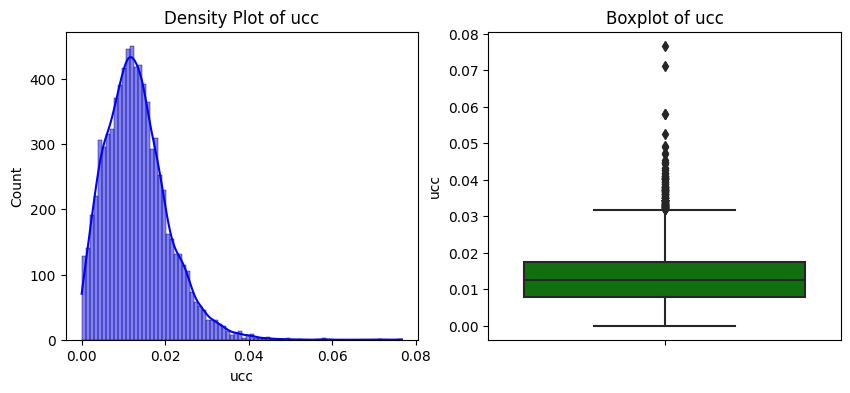

Column: uca
Summary Statistics:
count    8040.000000
mean        0.015407
std         0.009225
min         0.000000
25%         0.008900
50%         0.014590
75%         0.020680
max         0.107360
Name: uca, dtype: float64


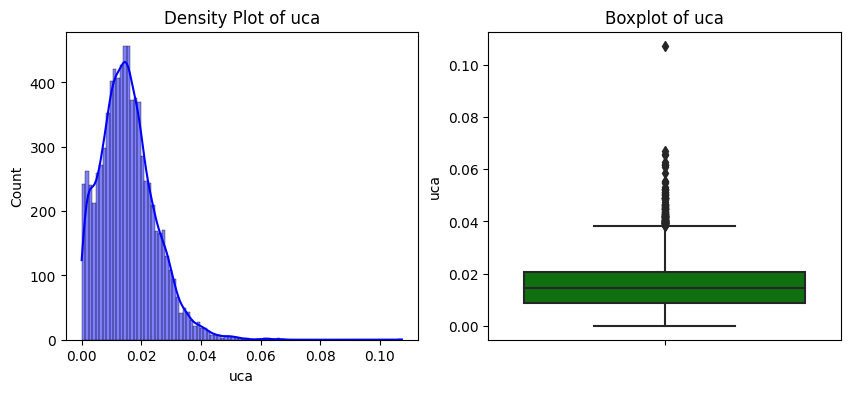

Column: ucg
Summary Statistics:
count    7993.000000
mean        0.007110
std         0.006026
min         0.000000
25%         0.002570
50%         0.005580
75%         0.010240
max         0.046470
Name: ucg, dtype: float64


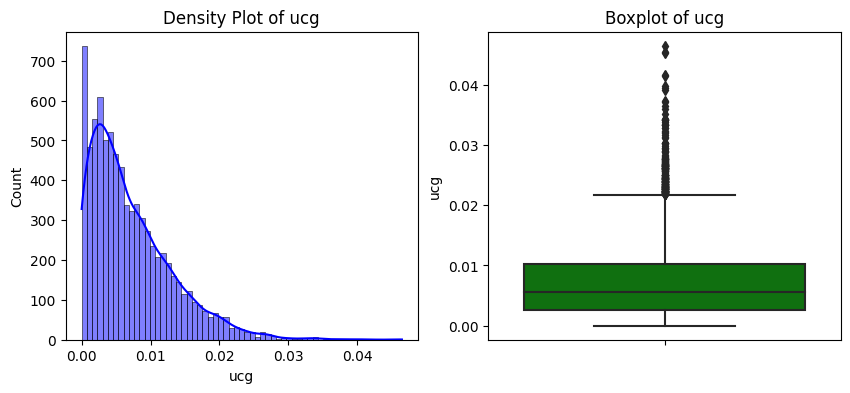

Column: agu
Summary Statistics:
count    7952.000000
mean        0.009697
std         0.006323
min         0.000000
25%         0.004450
50%         0.009550
75%         0.014020
max         0.051710
Name: agu, dtype: float64


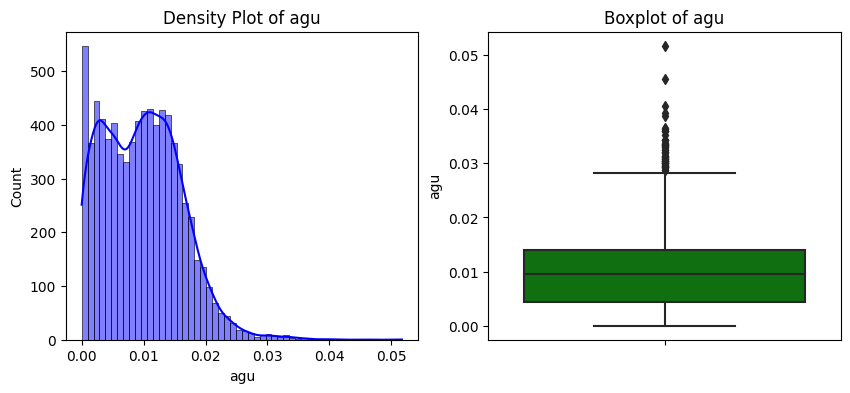

Column: agc
Summary Statistics:
count    8102.000000
mean        0.011093
std         0.006167
min         0.000000
25%         0.006740
50%         0.010540
75%         0.014527
max         0.050600
Name: agc, dtype: float64


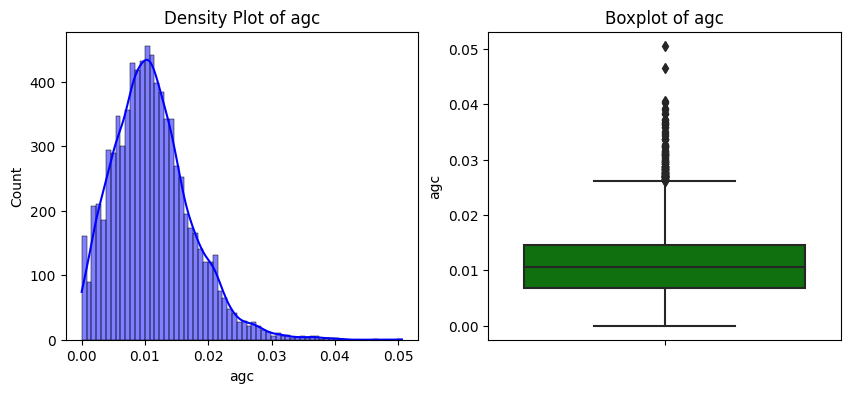

Column: acu
Summary Statistics:
count    7881.000000
mean        0.015916
std         0.008195
min         0.000000
25%         0.010530
50%         0.015620
75%         0.020650
max         0.095870
Name: acu, dtype: float64


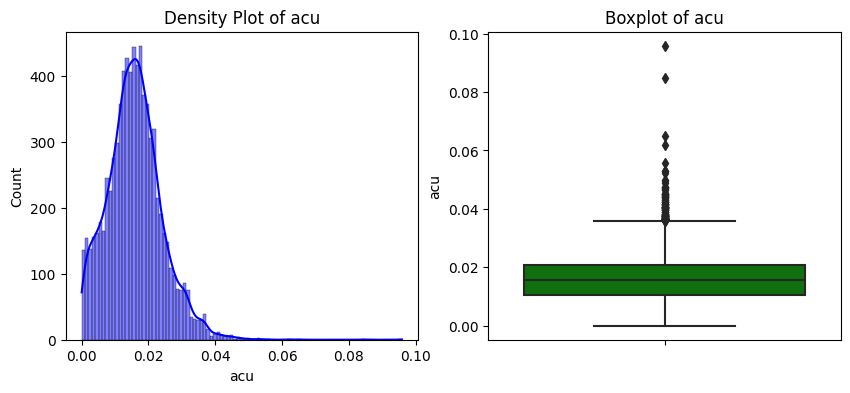

Column: acc
Summary Statistics:
count    7764.000000
mean        0.019165
std         0.012355
min         0.000000
25%         0.010038
50%         0.016845
75%         0.026132
max         0.106540
Name: acc, dtype: float64


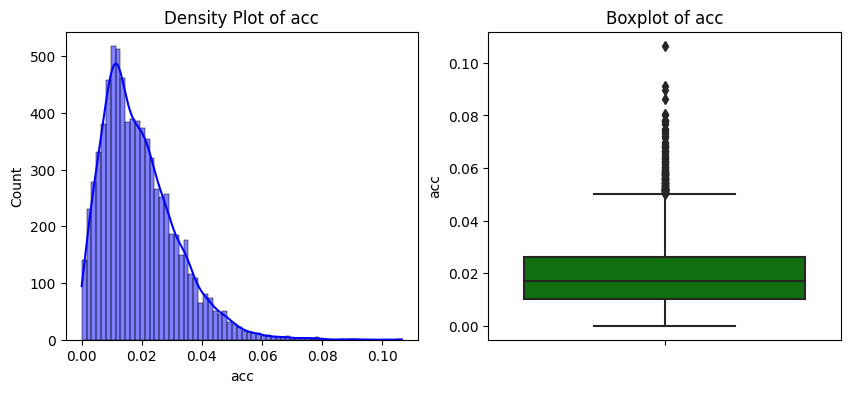

Column: aca
Summary Statistics:
count    8235.000000
mean        0.019017
std         0.013126
min         0.000000
25%         0.010000
50%         0.016440
75%         0.025880
max         0.116570
Name: aca, dtype: float64


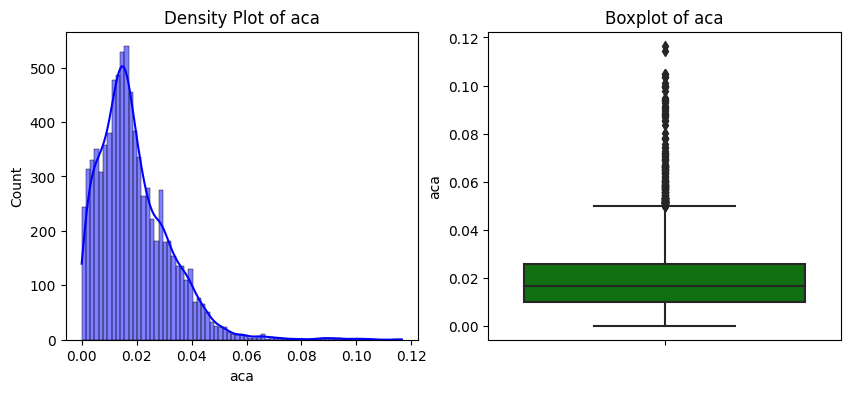

Column: acg
Summary Statistics:
count    8125.000000
mean        0.008177
std         0.006706
min         0.000000
25%         0.003170
50%         0.006510
75%         0.011820
max         0.061860
Name: acg, dtype: float64


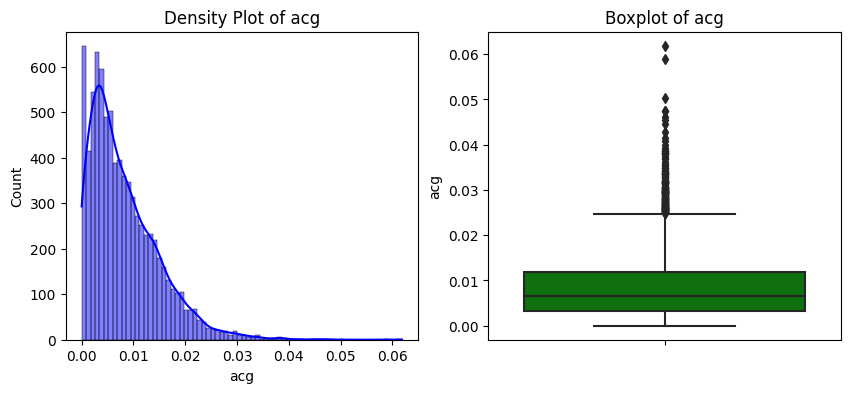

Column: uau
Summary Statistics:
count    7902.000000
mean        0.018400
std         0.011956
min         0.000000
25%         0.009825
50%         0.016180
75%         0.024930
max         0.076580
Name: uau, dtype: float64


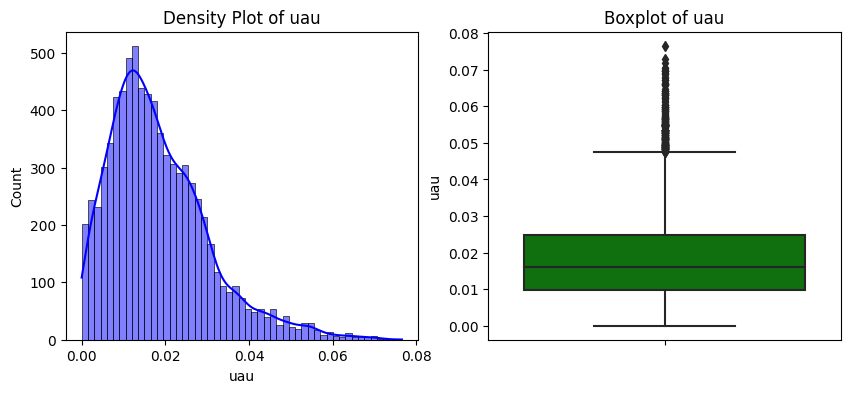

Column: uac
Summary Statistics:
count    8243.000000
mean        0.016183
std         0.007259
min         0.000000
25%         0.011020
50%         0.015480
75%         0.020170
max         0.069680
Name: uac, dtype: float64


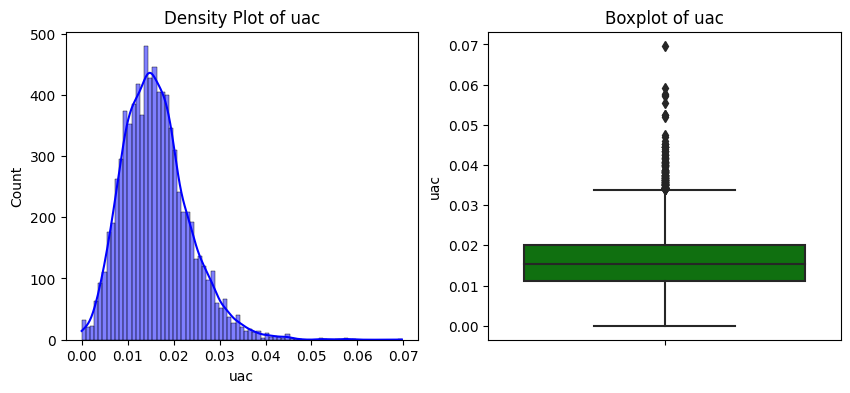

Column: caa
Summary Statistics:
count    7949.000000
mean        0.019429
std         0.011406
min         0.000000
25%         0.012890
50%         0.019060
75%         0.025110
max         0.240090
Name: caa, dtype: float64


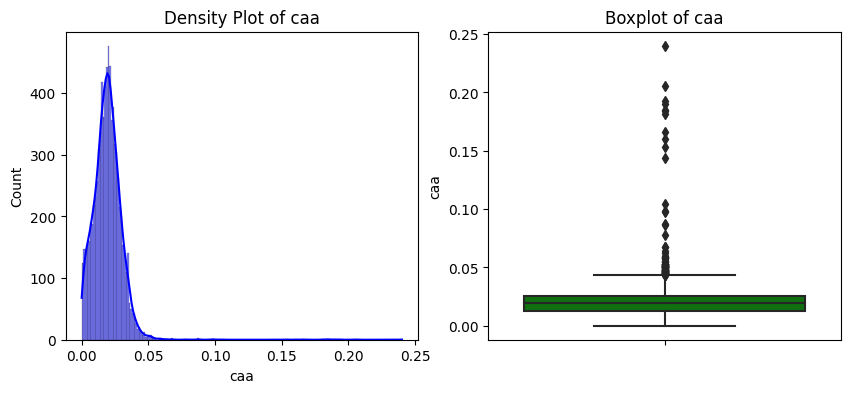

Column: cag
Summary Statistics:
count    7888.000000
mean        0.015590
std         0.011348
min         0.000000
25%         0.005980
50%         0.014540
75%         0.023152
max         0.106970
Name: cag, dtype: float64


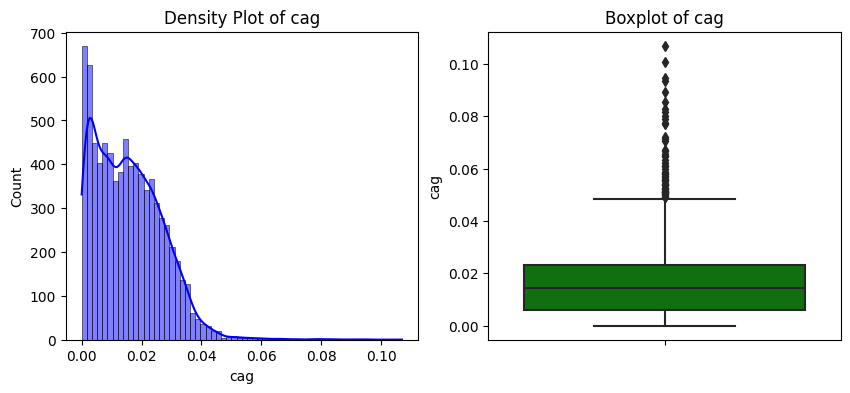

Column: aau
Summary Statistics:
count    7824.000000
mean        0.022519
std         0.014987
min         0.000000
25%         0.011310
50%         0.019750
75%         0.031430
max         0.134330
Name: aau, dtype: float64


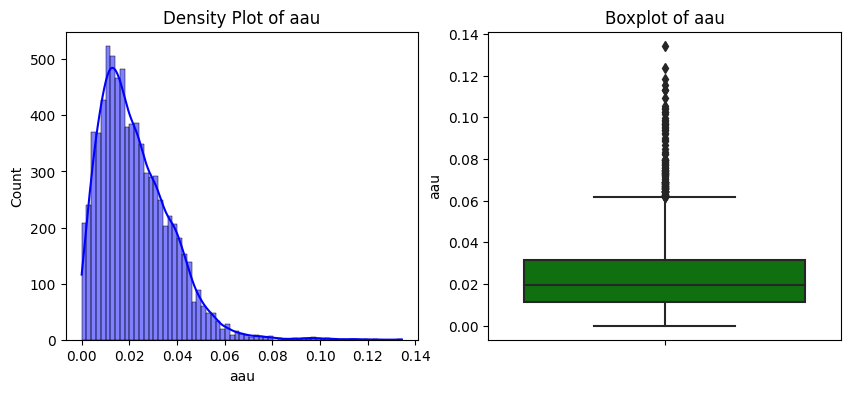

Column: aac
Summary Statistics:
count    7989.000000
mean        0.021957
std         0.009564
min         0.000000
25%         0.015510
50%         0.021100
75%         0.027380
max         0.111310
Name: aac, dtype: float64


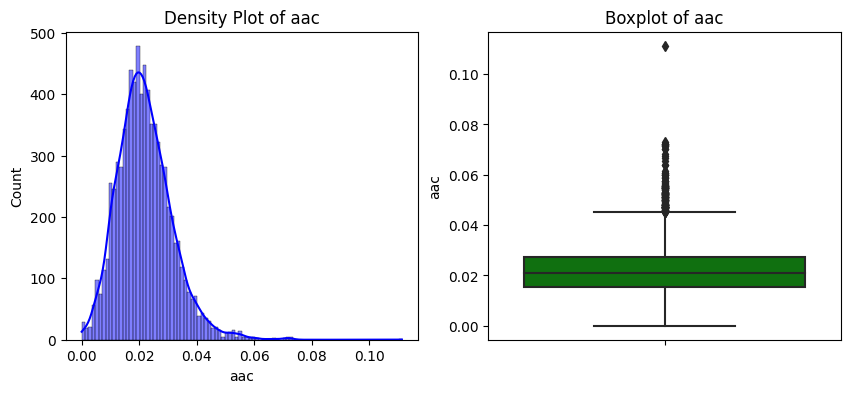

Column: ugu
Summary Statistics:
count    7969.000000
mean        0.007311
std         0.006264
min         0.000000
25%         0.002680
50%         0.006210
75%         0.010270
max         0.087120
Name: ugu, dtype: float64


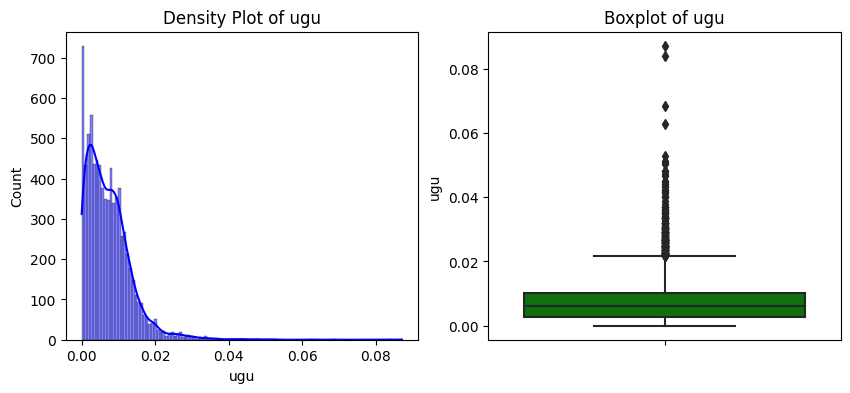

Column: ugc
Summary Statistics:
count    7864.000000
mean        0.007569
std         0.006422
min         0.000000
25%         0.003620
50%         0.006500
75%         0.009980
max         0.087790
Name: ugc, dtype: float64


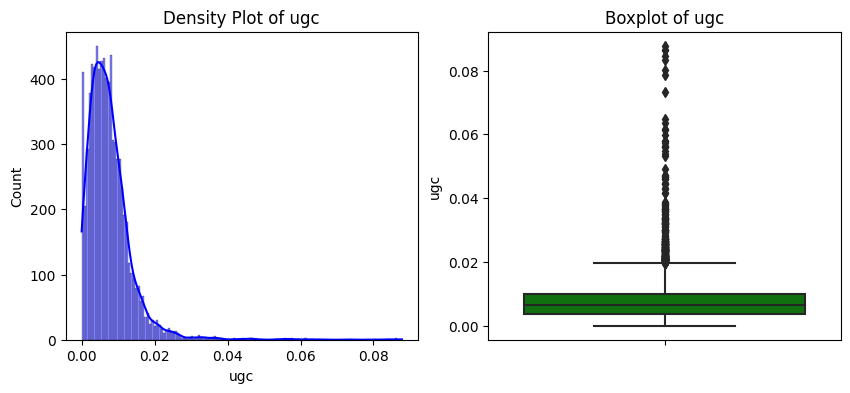

Column: cau
Summary Statistics:
count    7945.000000
mean        0.011628
std         0.006902
min         0.000000
25%         0.007080
50%         0.010690
75%         0.014810
max         0.063830
Name: cau, dtype: float64


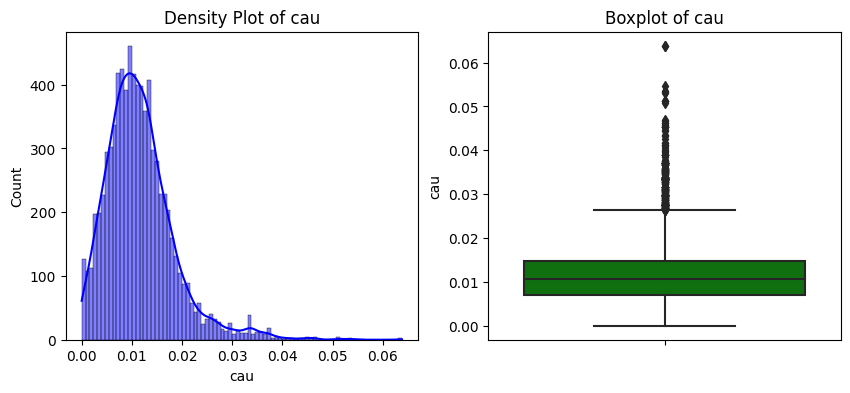

Column: cac
Summary Statistics:
count    7874.000000
mean        0.012092
std         0.006526
min         0.000000
25%         0.007160
50%         0.011300
75%         0.016450
max         0.048110
Name: cac, dtype: float64


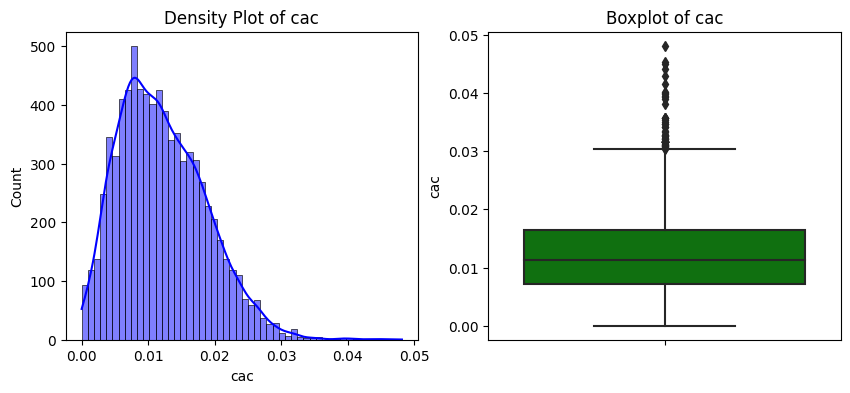

Column: aaa
Summary Statistics:
count    8028.000000
mean        0.028541
std         0.017659
min         0.000000
25%         0.017442
50%         0.025470
75%         0.037333
max         0.146010
Name: aaa, dtype: float64


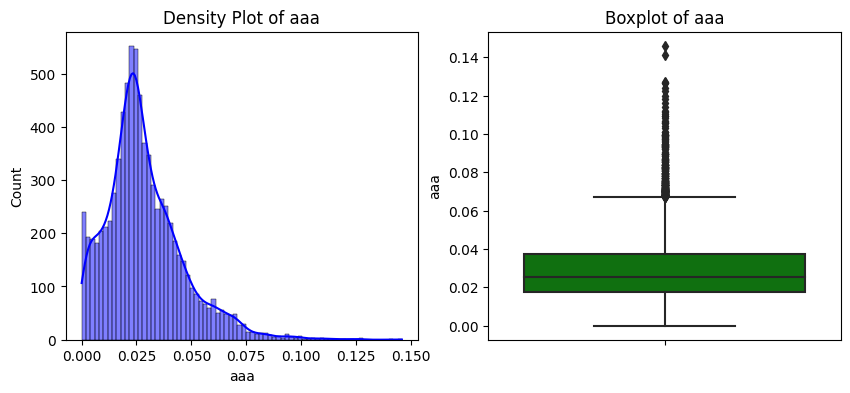

Column: aag
Summary Statistics:
count    8143.000000
mean        0.021522
std         0.014431
min         0.000000
25%         0.010335
50%         0.021180
75%         0.030920
max         0.106530
Name: aag, dtype: float64


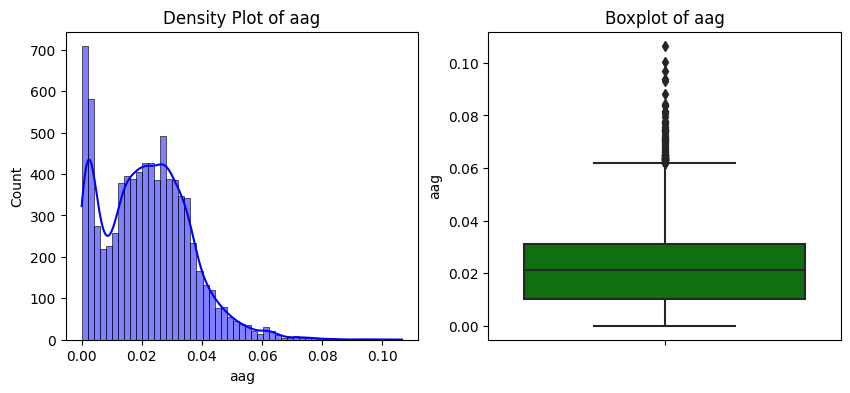

Column: cgu
Summary Statistics:
count    8200.000000
mean        0.008044
std         0.006313
min         0.000000
25%         0.003200
50%         0.006935
75%         0.011410
max         0.063100
Name: cgu, dtype: float64


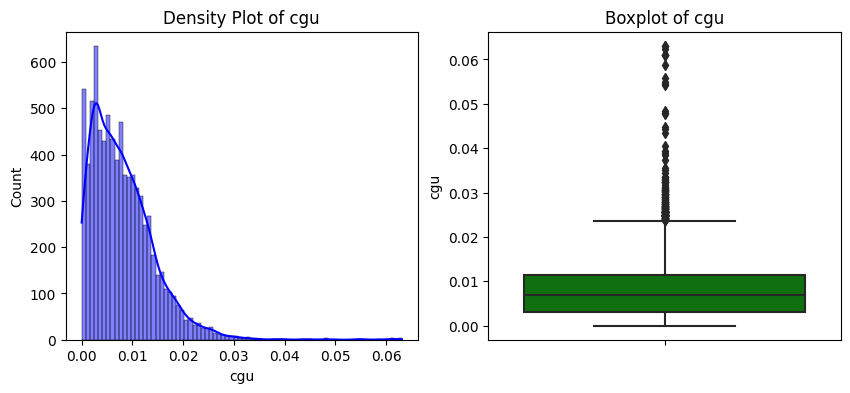

Column: cgc
Summary Statistics:
count    7886.000000
mean        0.009673
std         0.010636
min         0.000000
25%         0.002880
50%         0.005740
75%         0.011957
max         0.070720
Name: cgc, dtype: float64


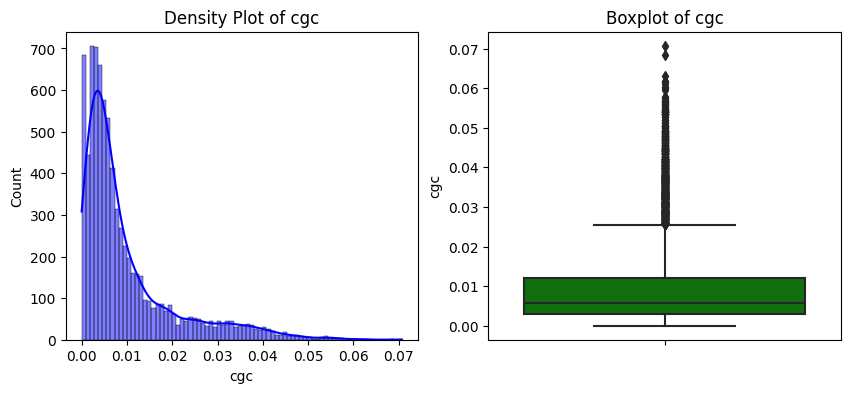

Column: cga
Summary Statistics:
count    7815.000000
mean        0.007036
std         0.004778
min         0.000000
25%         0.003420
50%         0.006120
75%         0.009915
max         0.035000
Name: cga, dtype: float64


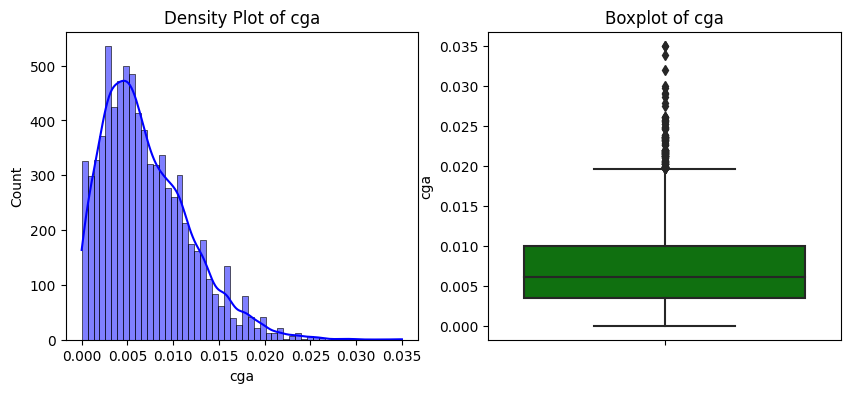

Column: cgg
Summary Statistics:
count    7895.000000
mean        0.005483
std         0.006596
min         0.000000
25%         0.001250
50%         0.003590
75%         0.007210
max         0.055540
Name: cgg, dtype: float64


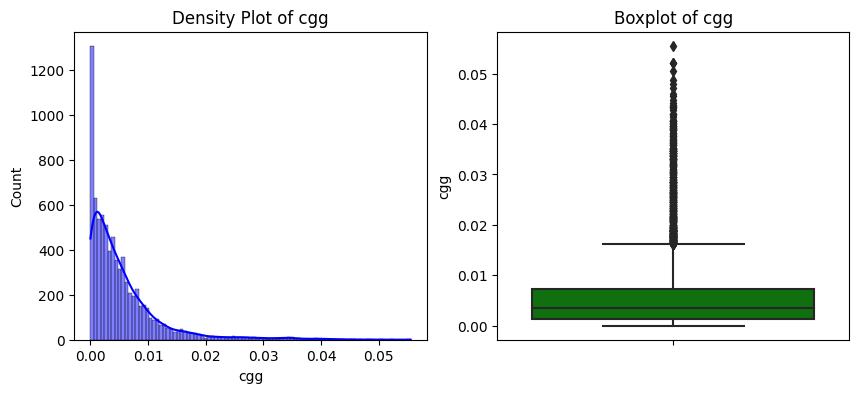

Column: aga
Summary Statistics:
count    7988.000000
mean        0.009973
std         0.008525
min         0.000000
25%         0.001868
50%         0.009540
75%         0.015870
max         0.098830
Name: aga, dtype: float64


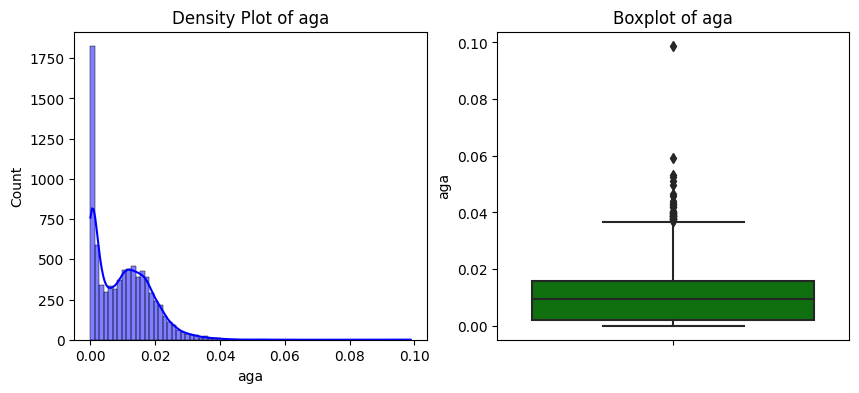

Column: agg
Summary Statistics:
count    8079.000000
mean        0.006429
std         0.006398
min         0.000000
25%         0.001190
50%         0.004580
75%         0.010240
max         0.058430
Name: agg, dtype: float64


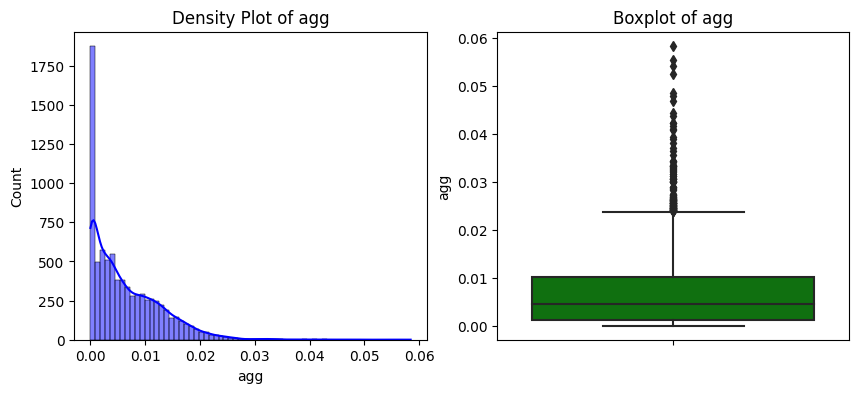

Column: gau
Summary Statistics:
count    8240.000000
mean        0.024273
std         0.013820
min         0.000000
25%         0.012620
50%         0.025490
75%         0.034313
max         0.185660
Name: gau, dtype: float64


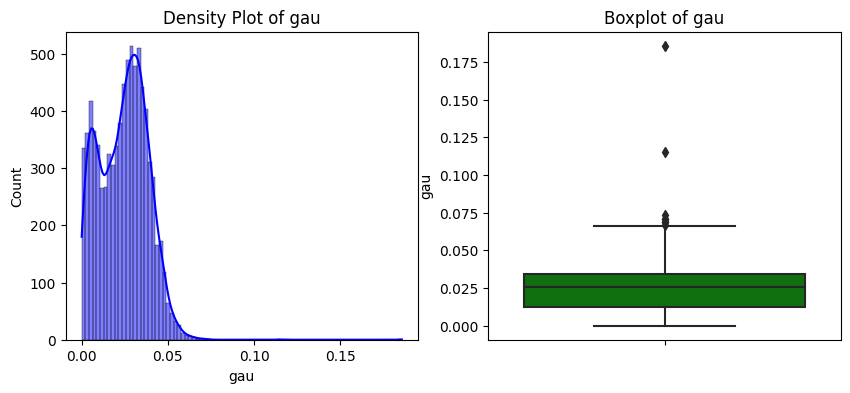

Column: gac
Summary Statistics:
count    7971.000000
mean        0.021190
std         0.012933
min         0.000000
25%         0.012020
50%         0.019110
75%         0.027630
max         0.113840
Name: gac, dtype: float64


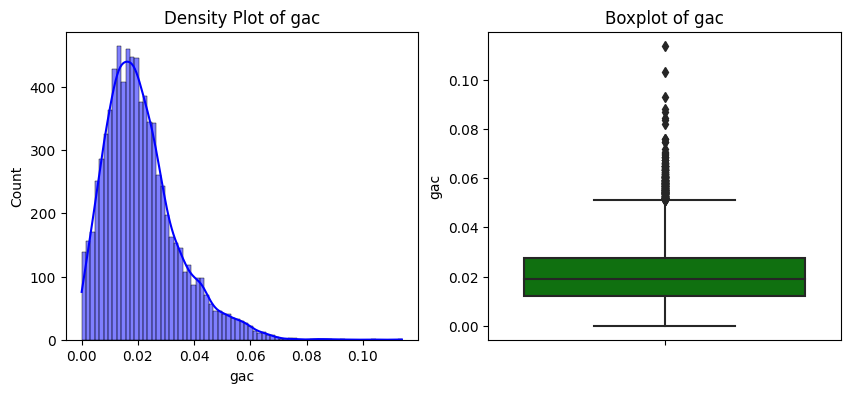

Column: gaa
Summary Statistics:
count    7770.000000
mean        0.028330
std         0.014386
min         0.000000
25%         0.017380
50%         0.026065
75%         0.036897
max         0.144890
Name: gaa, dtype: float64


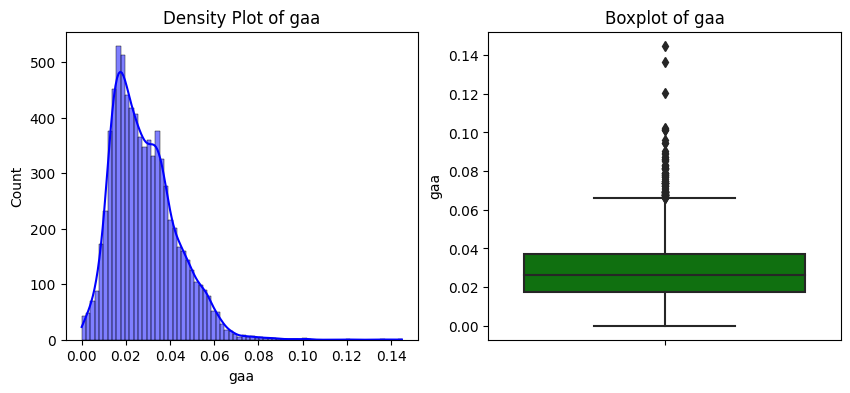

Column: gag
Summary Statistics:
count    7800.000000
mean        0.021680
std         0.014993
min         0.000000
25%         0.009780
50%         0.020485
75%         0.030980
max         0.113060
Name: gag, dtype: float64


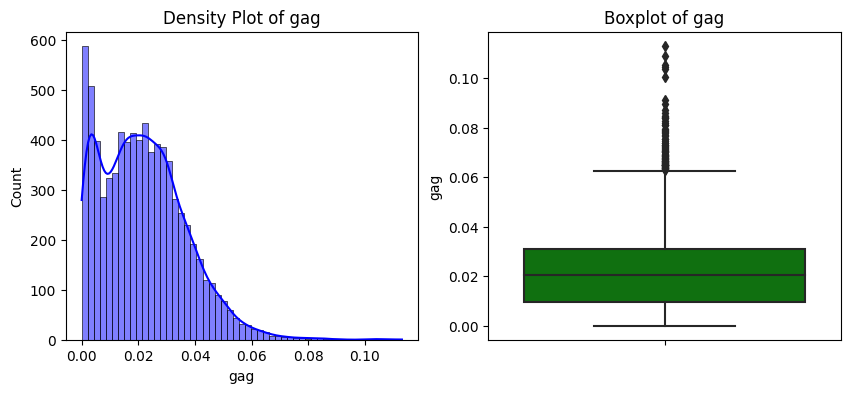

Column: uaa
Summary Statistics:
count    7968.000000
mean        0.001633
std         0.001812
min         0.000000
25%         0.000560
50%         0.001350
75%         0.002350
max         0.045200
Name: uaa, dtype: float64


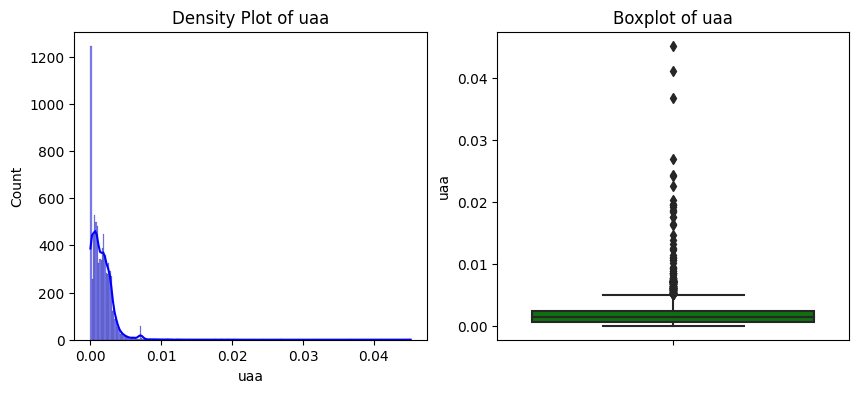

Column: uag
Summary Statistics:
count    8021.000000
mean        0.000593
std         0.000916
min         0.000000
25%         0.000000
50%         0.000420
75%         0.000830
max         0.024730
Name: uag, dtype: float64


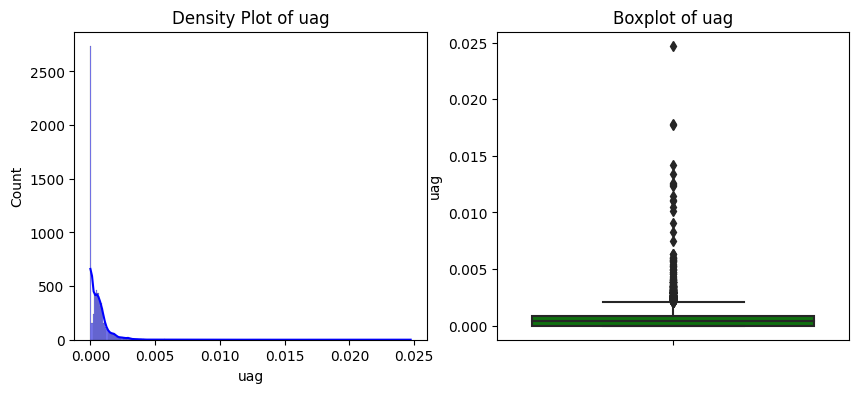

Column: uga
Summary Statistics:
count    7902.000000
mean        0.006074
std         0.010253
min         0.000000
25%         0.000400
50%         0.001130
75%         0.002830
max         0.106700
Name: uga, dtype: float64


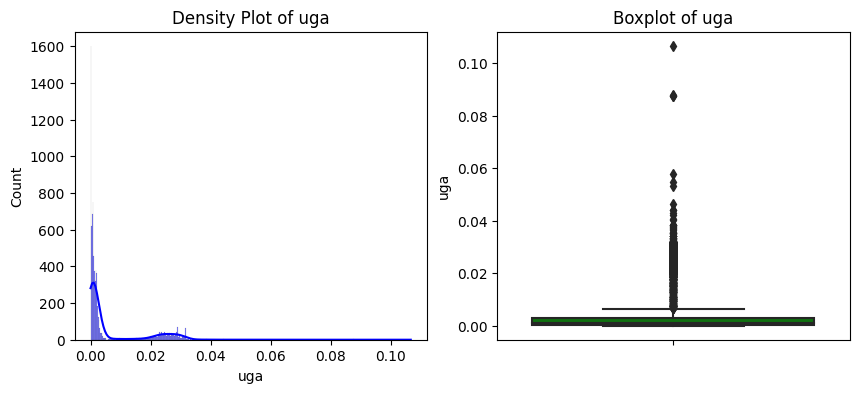

Column: genotype
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: genotype, dtype: float64


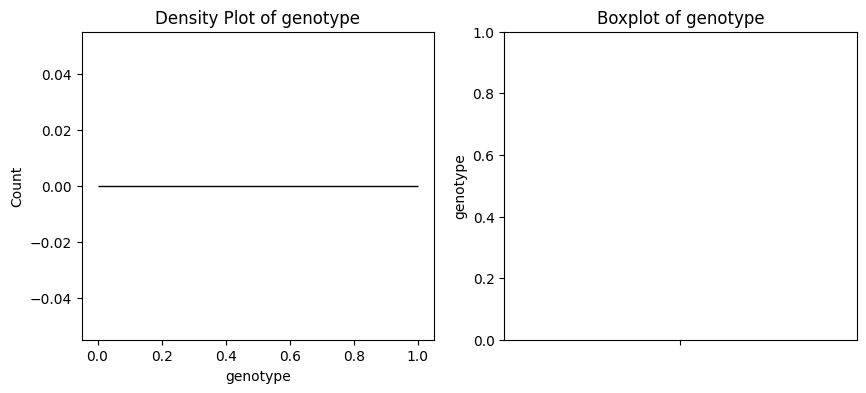

Column: isolate
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: isolate, dtype: float64


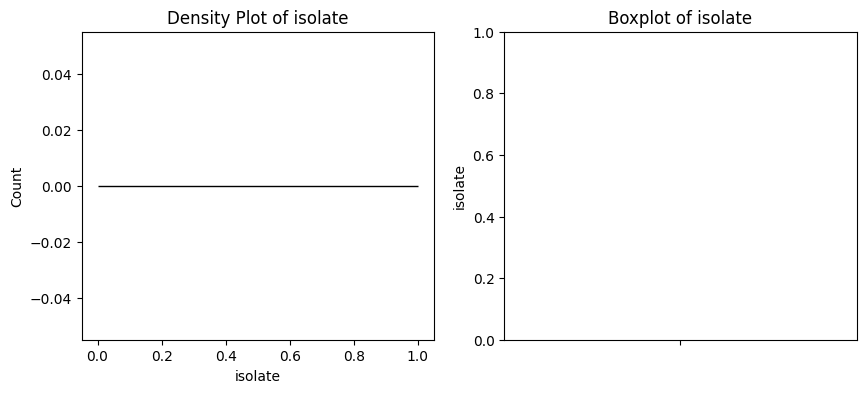

Column: morph
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: morph, dtype: float64


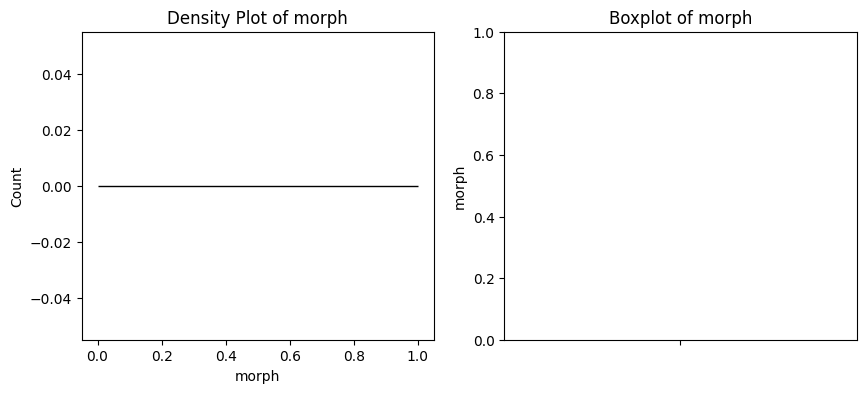

Column: forma
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: forma, dtype: float64


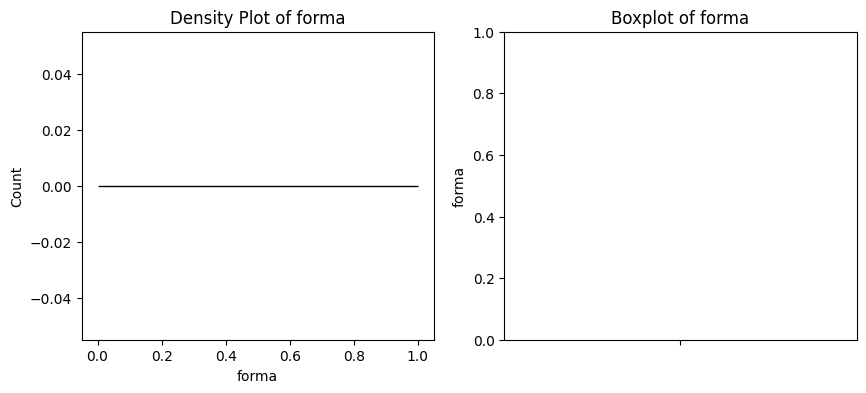

Column: subsection
Summary Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: subsection, dtype: float64


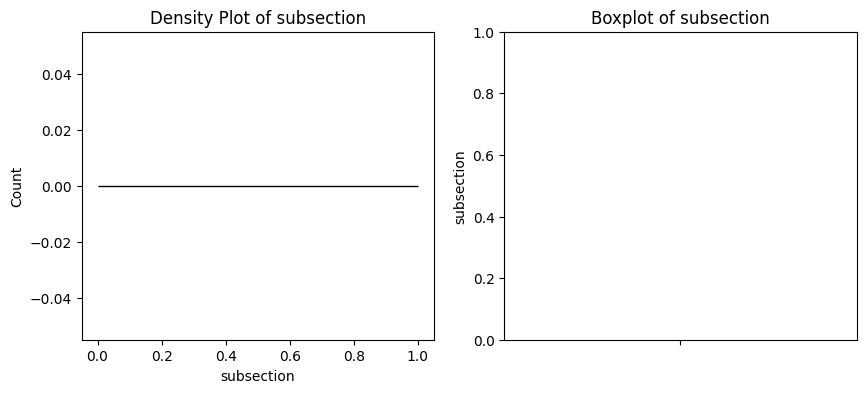

In [15]:
for col in float_cols:
    print("Column:", col)
    print("Summary Statistics:")
    print(df[col].describe())
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Density Plot of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Categorical Column Univariate Analysis

Column: section
Value Counts:
section
Euphorbia sect. Lagascae    1
Name: count, dtype: int64
Bar plot:


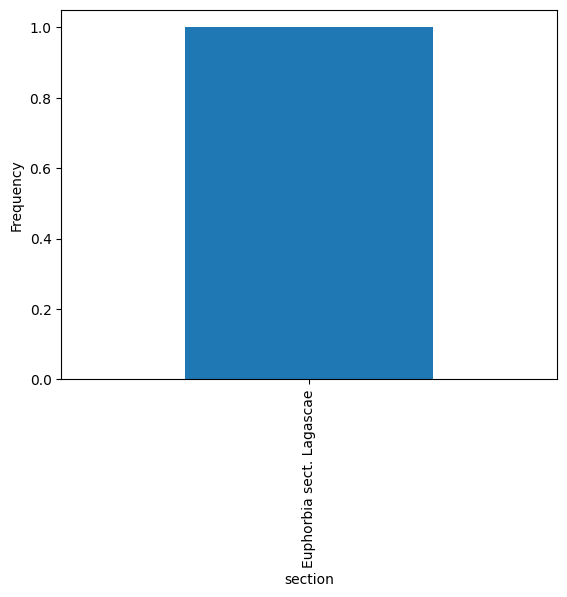

Column: class
Value Counts:
class
Magnoliopsida            107
Gammaproteobacteria       72
Actinomycetes             56
Pisoniviricetes           53
Repensiviricetes          47
                        ... 
Syntrophia                 1
Branchiopoda               1
Enoplea                    1
Epsilonproteobacteria      1
Thermoplasmata             1
Name: count, Length: 123, dtype: int64
Bar plot:


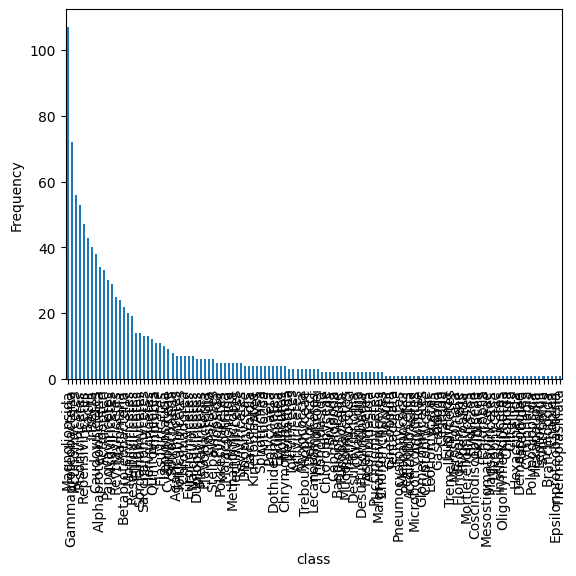

Column: infraclass
Value Counts:
infraclass
Neoptera         30
Teleostei        25
Neognathae        5
Euheterodonta     1
Neocopepoda       1
Name: count, dtype: int64
Bar plot:


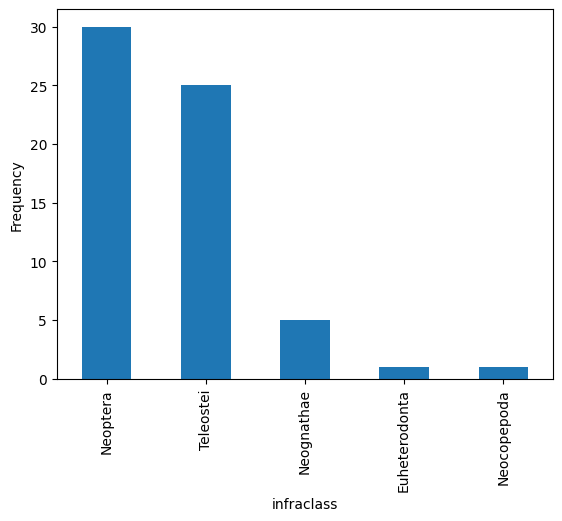

Column: cohort
Value Counts:
cohort
Endopterygota        38
Euteleosteomorpha    26
Otomorpha             8
Polyneoptera          4
Paraneoptera          3
Name: count, dtype: int64
Bar plot:


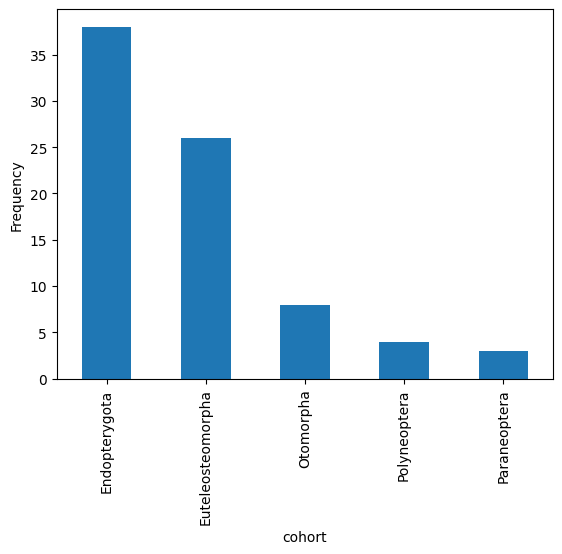

Column: superorder
Value Counts:
superorder
Euarchontoglires    24
Amphiesmenoptera    15
Laurasiatheria      10
Eucarida             9
Batrachia            8
Cichlomorphae        6
Cypriniphysae        3
Batoidea             3
Echinacea            3
Galloanserae         3
Dictyoptera          2
Decapodiformes       2
Galeoidea            2
Ceratodontae         1
Peracarida           1
Parasitiformes       1
Forcipulatacea       1
Octopodiformes       1
Acariformes          1
Heterodontoidea      1
Imparidentia         1
Name: count, dtype: int64
Bar plot:


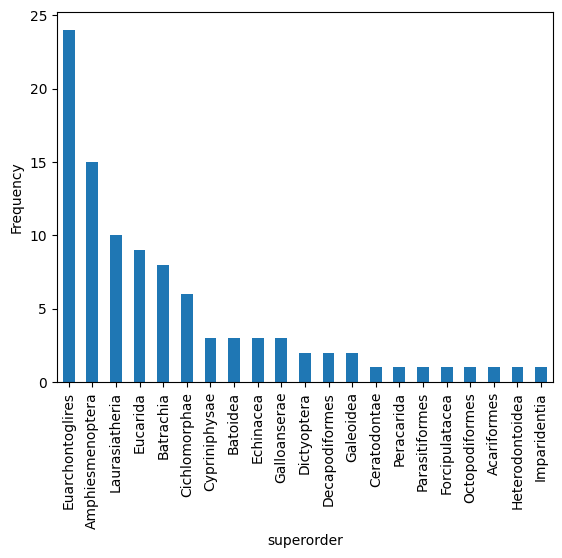

Column: parvorder
Value Counts:
parvorder
Heteroneura    9
Odontoceti     2
Platyrrhini    2
Mysticeti      1
Catarrhini     1
Buthida        1
Name: count, dtype: int64
Bar plot:


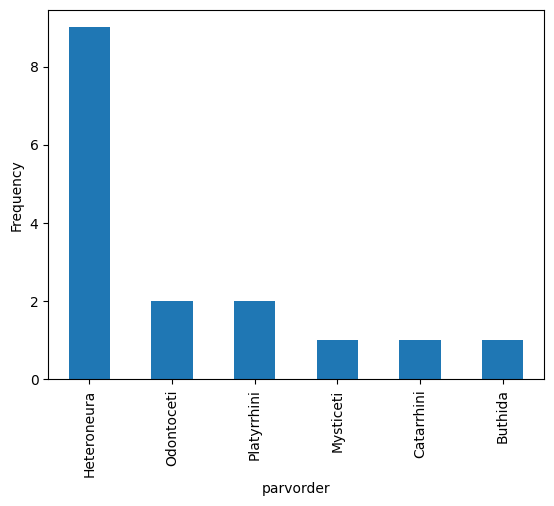

Column: infraorder
Value Counts:
infraorder
Muscomorpha        12
Simiiformes         9
Cucujiformia        6
Neolepidoptera      6
Serpentes           5
Brachyura           4
Pecora              3
Culicomorpha        3
Psychodomorpha      2
Rhabditomorpha      2
Cetacea             2
Cimicomorpha        2
Chiromyiformes      1
Echinidea           1
Cicadomorpha        1
Lorisiformes        1
Talitrida           1
Scarabaeiformia     1
Astacidea           1
Zoarcales           1
Pentatomomorpha     1
Gasterosteales      1
Elateriformia       1
Ascaridomorpha      1
Name: count, dtype: int64
Bar plot:


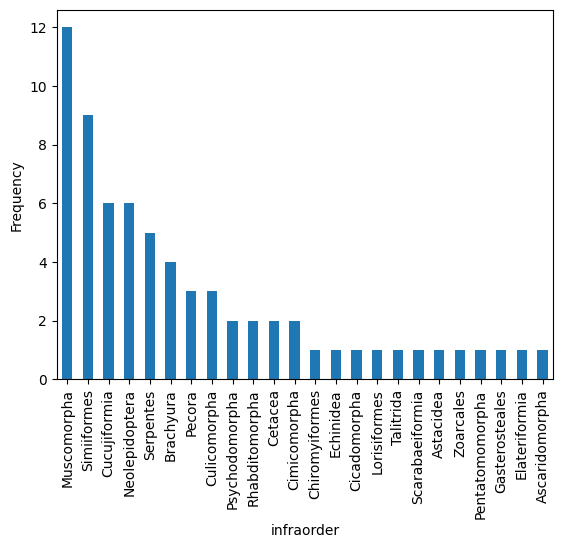

Column: superclass
Value Counts:
superclass
Sarcopterygii     51
Actinopterygii    25
Multicrustacea    11
Oligostraca        1
Asterozoa          1
Echinozoa          1
Name: count, dtype: int64
Bar plot:


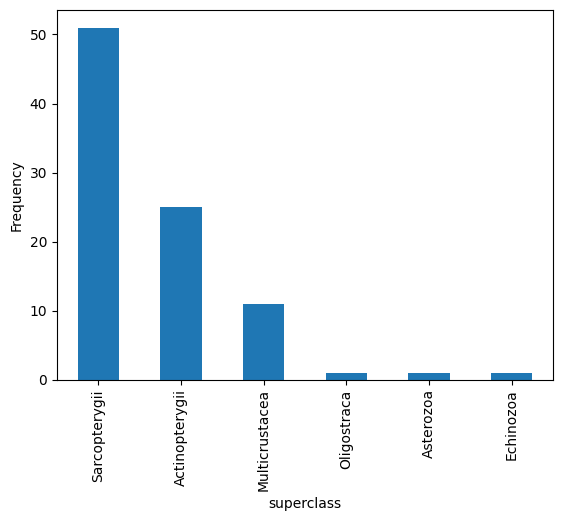

Column: subcohort
Value Counts:
subcohort
Ostariophysi    2
Clupei          2
Name: count, dtype: int64
Bar plot:


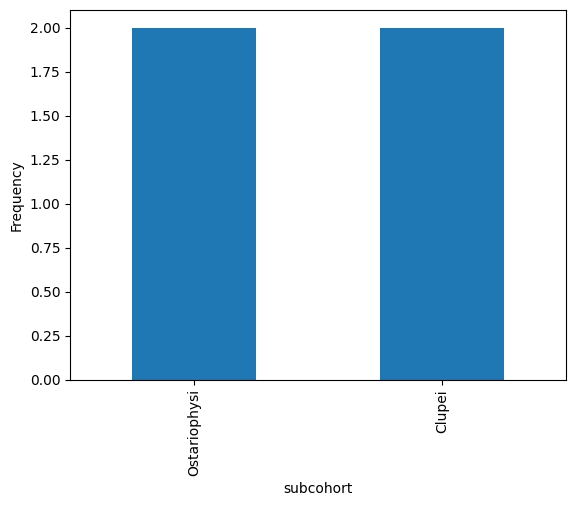

Column: serogroup
Value Counts:
serogroup
Vibrio cholerae O1    1
Name: count, dtype: int64
Bar plot:


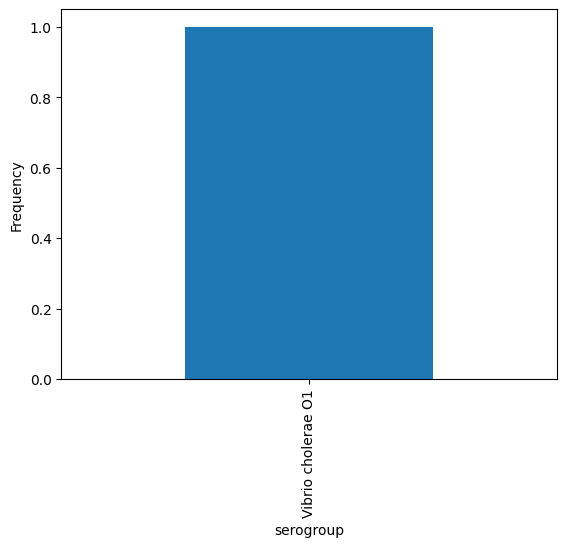

Column: speciesname
Value Counts:
speciesname
Escherichia coli O111                      3
Honeysuckle yellow vein virus-[Japan       2
Squash leaf curl China virus - [Pumpkin    2
Escherichia coli O157                      2
Pseudomonas phage phi8                     1
                                          ..
East Asian Passiflora virus                1
mitochondrion Doryrhamphus excisus         1
Stenotrophomonas phage SMB14               1
Macropus rufogriseus                       1
Methylobacillus sp. SK-5                   1
Name: count, Length: 7874, dtype: int64
Bar plot:


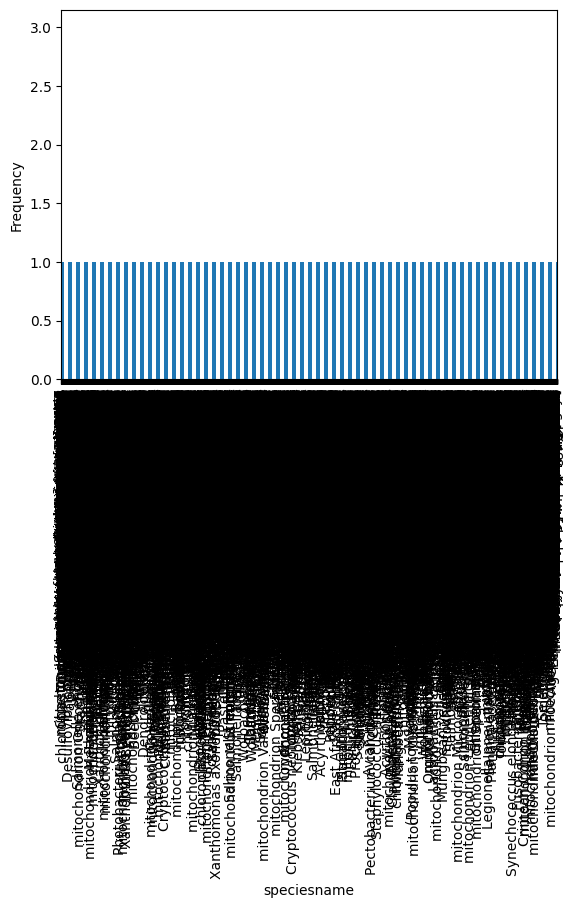

Column: superkingdom
Value Counts:
superkingdom
Viruses      453
Eukaryota    377
Bacteria     306
Archaea       17
Name: count, dtype: int64
Bar plot:


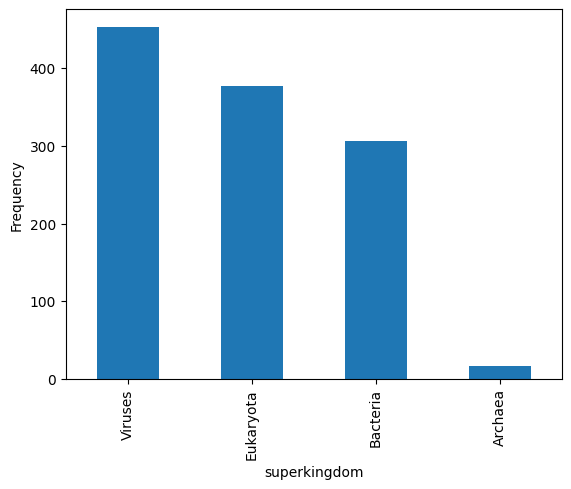

Column: clade
Value Counts:
clade
Riboviria              205
Terrabacteria group    112
Monodnaviria            90
Duplodnaviria           79
Varidnaviria            28
                      ... 
Entelegynae              1
apioid superclade        1
Norovirus GII.4          1
grimshawi clade          1
Discoba                  1
Name: count, Length: 95, dtype: int64
Bar plot:


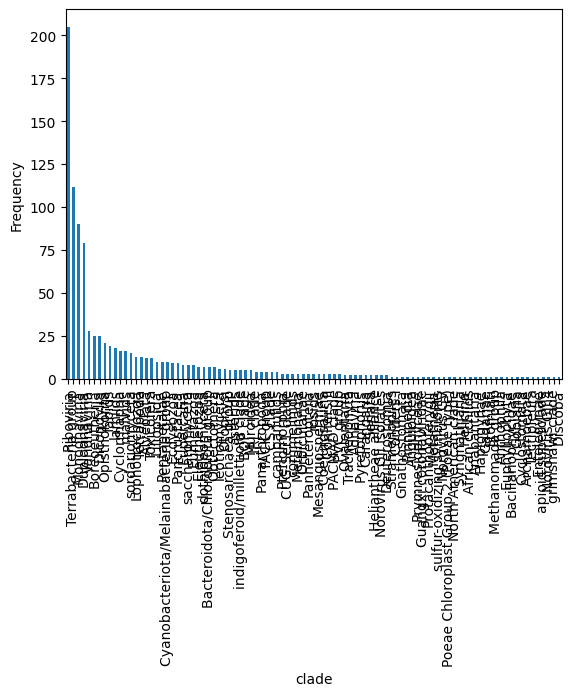

Column: kingdom
Value Counts:
kingdom
Orthornavirae     211
Metazoa           194
Viridiplantae     135
Shotokuvirae       98
Fungi              74
Heunggongvirae     69
Bamfordvirae       32
Pararnavirae       22
Loebvirae           5
Sangervirae         3
Zilligvirae         2
Trapavirae          1
Name: count, dtype: int64
Bar plot:


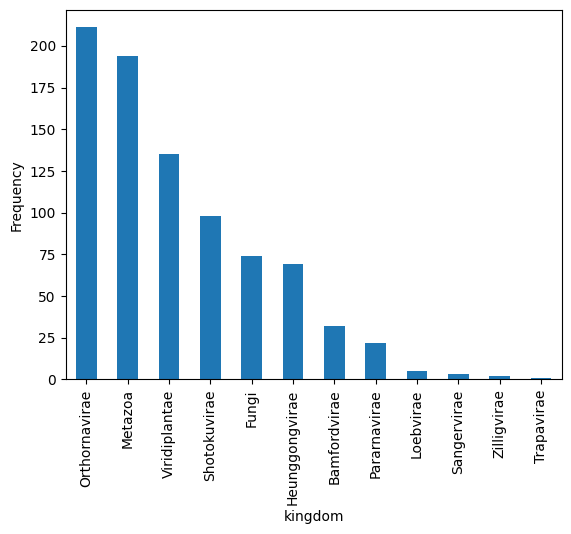

Column: subkingdom
Value Counts:
subkingdom
Dikarya    65
Name: count, dtype: int64
Bar plot:


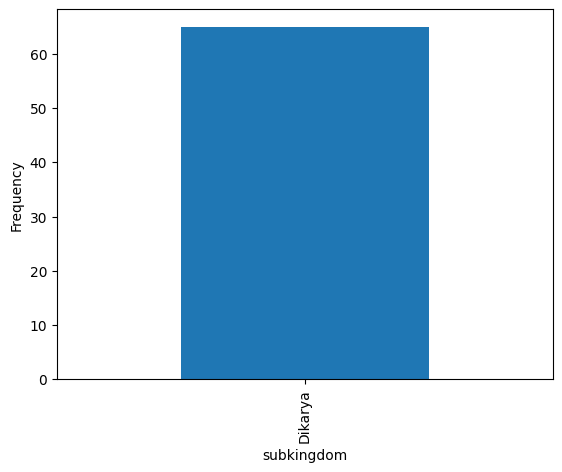

Column: family
Value Counts:
family
Geminiviridae        52
Streptomycetaceae    28
Picornaviridae       25
Coronaviridae        18
Papillomaviridae     16
                     ..
Primulaceae           1
Cytophagaceae         1
Sphaerotilaceae       1
Physaraceae           1
Filoviridae           1
Name: count, Length: 390, dtype: int64
Bar plot:


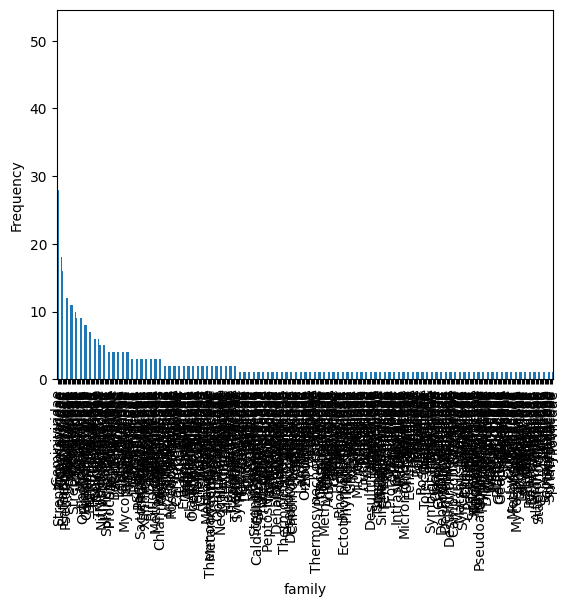

Column: subfamily
Value Counts:
subfamily
Firstpapillomavirinae    21
Ensavirinae              21
Orthocoronavirinae       17
Pooideae                 15
Orthoretrovirinae        11
                         ..
Allioideae                1
Asparagoideae             1
Colubrinae                1
Elaterinae                1
Luciopercinae             1
Name: count, Length: 138, dtype: int64
Bar plot:


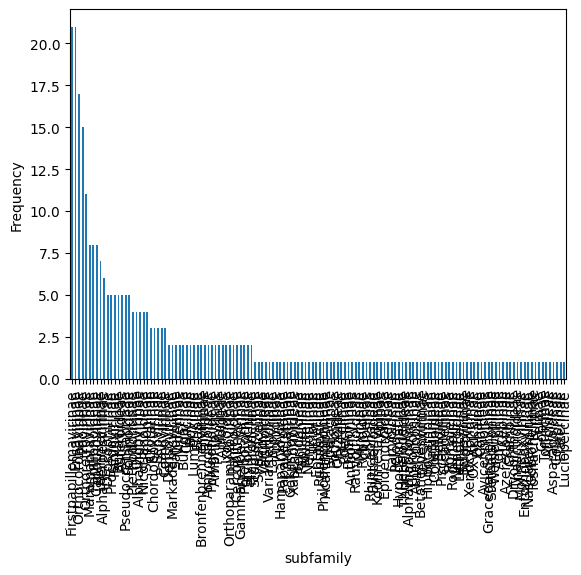

Column: type
Value Counts:
type
bacteria         2209
virus            2116
plant            1905
vertebrate       1542
invertebrate     1004
mammal            430
rodent            168
bacteriophage     165
primate           119
archaea            96
plasmid            17
Name: count, dtype: int64
Bar plot:


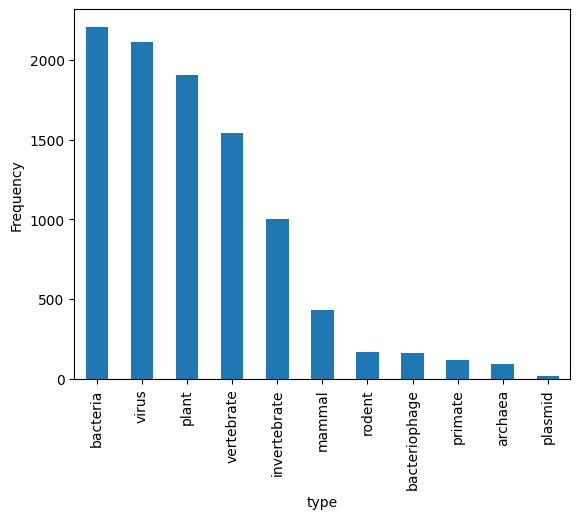

Column: uuu
Value Counts:
uuu
0          41
0.04618    19
0.04536    16
0.0105     10
0.02105    10
           ..
0.00531     1
0.01409     1
0.00704     1
0.05294     1
0.0312      1
Name: count, Length: 4687, dtype: int64
Bar plot:


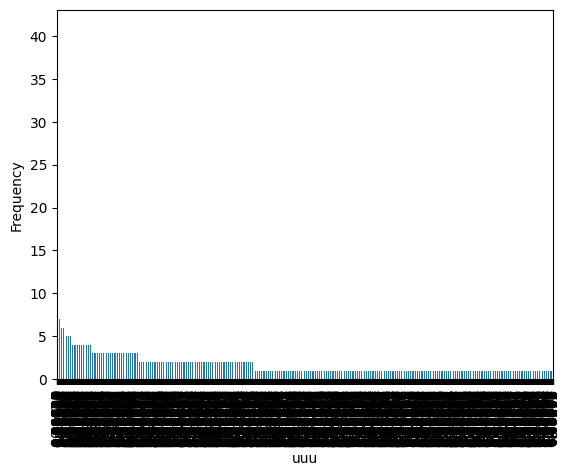

Column: no rank
Value Counts:
no rank
cellular organisms                         441
root                                       103
Clupeocephala                               26
unclassified Caudoviricetes                 13
Acalyptratae                                 9
                                          ... 
Penicillium chrysogenum species complex      1
Bactrocera dorsalis complex                  1
Macacine gammaherpesvirus 5                  1
Muscovy duck circovirus                      1
Escherichia phage phiK                       1
Name: count, Length: 331, dtype: int64
Bar plot:


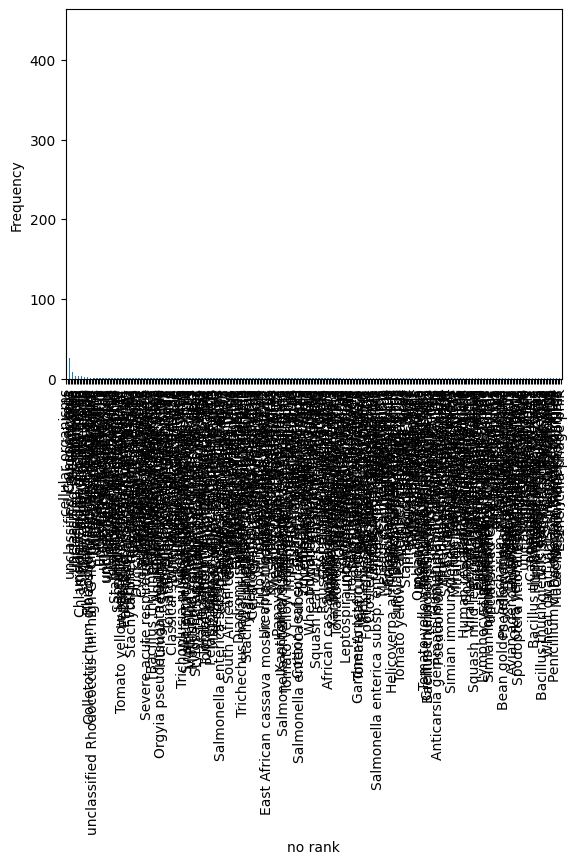

Column: superfamily
Value Counts:
superfamily
Colubroidea         12
Ephydroidea          7
Salamandroidea       5
Oestroidea           4
Bombycoidea          3
Elateroidea          2
Hyloidea             2
Pipoidea             2
Ranoidea             2
Cercopithecoidea     2
Noctuoidea           1
Opomyzoidea          1
Chrysomeloidea       1
Aphelenchoidea       1
Cercopoidea          1
Curculionoidea       1
Buthoidea            1
Formicoidea          1
Cancroidea           1
Culicoidea           1
Conoidea             1
Dermanyssoidea       1
Glycyphagoidea       1
Chironomoidea        1
Ampullarioidea       1
Gonodactyloidea      1
Dascilloidea         1
Hominoidea           1
Passeroidea          1
Ichneumonoidea       1
Membracoidea         1
Musteloidea          1
Pyraloidea           1
Cyrenoidea           1
Haliotoidea          1
Forficuloidea        1
Balanoidea           1
Bythograeoidea       1
Helicoidea           1
Tortricoidea         1
Hippoboscoidea       1
Rhabditoide

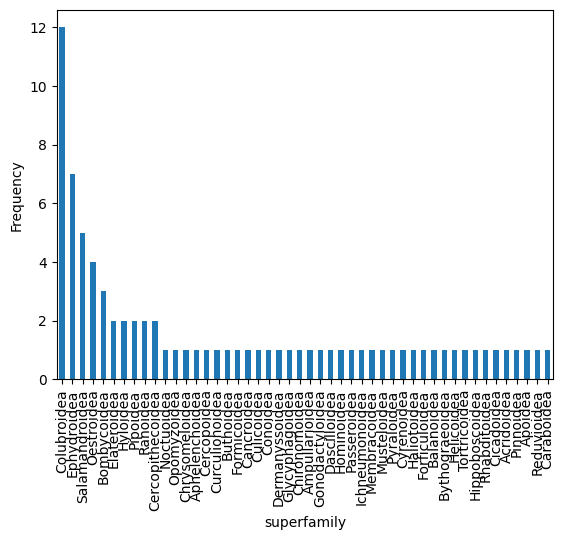

Column: phylum
Value Counts:
phylum
Pseudomonadota             150
Streptophyta               135
Pisuviricota                96
Chordata                    92
Arthropoda                  70
Bacillota                   55
Actinomycetota              50
Uroviricota                 49
Cressdnaviricota            48
Negarnaviricota             48
Kitrinoviricota             40
Cossaviricota               33
Ascomycota                  31
Duplornaviricota            25
Artverviricota              17
Nucleocytoviricota          15
Basidiomycota               13
Cyanobacteriota             12
Peploviricota               11
Mollusca                    11
Euryarchaeota               10
Nematoda                    10
Preplasmiviricota           10
Cnidaria                     8
Apicomplexa                  7
Phixviricota                 7
Spirochaetota                6
Thermoproteota               6
Thermodesulfobacteriota      5
Bacteroidota                 5
Mycoplasmatota               5
Eug

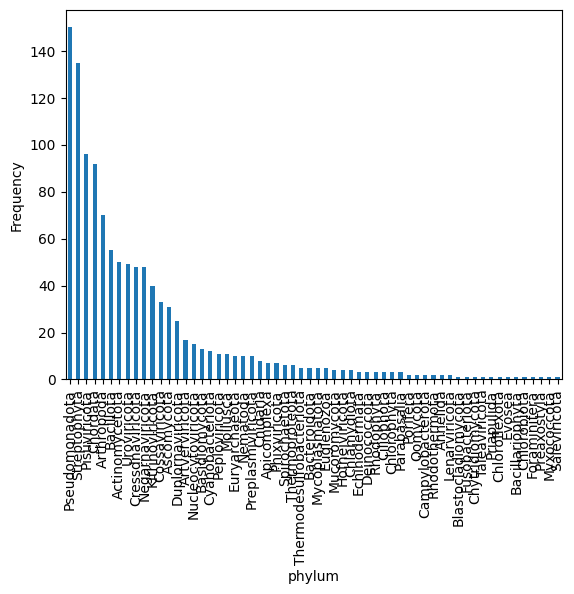

Column: subphylum
Value Counts:
subphylum
Streptophytina         119
Craniata                94
Hexapoda                40
Pezizomycotina          22
Haploviricotina         21
Polyploviricotina       21
Saccharomycotina         8
Agaricomycotina          7
Crustacea                6
Intramacronucleata       5
Chelicerata              3
Taphrinomycotina         1
Mucoromycotina           1
Linguliformea            1
Mortierellomycotina      1
Ustilaginomycotina       1
Name: count, dtype: int64
Bar plot:


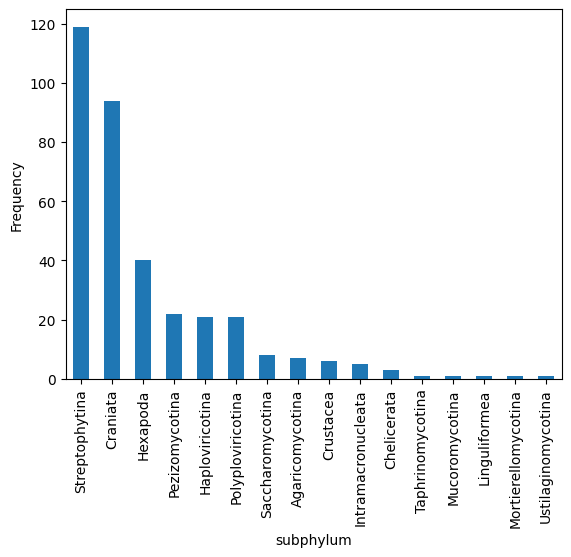

Column: order
Value Counts:
order
Geplafuvirales    62
Picornavirales    40
Bacillales        29
Bunyavirales      28
Nidovirales       28
                  ..
Cryppavirales      1
Ericales           1
Selaginellales     1
Geobacterales      1
Euglenales         1
Name: count, Length: 254, dtype: int64
Bar plot:


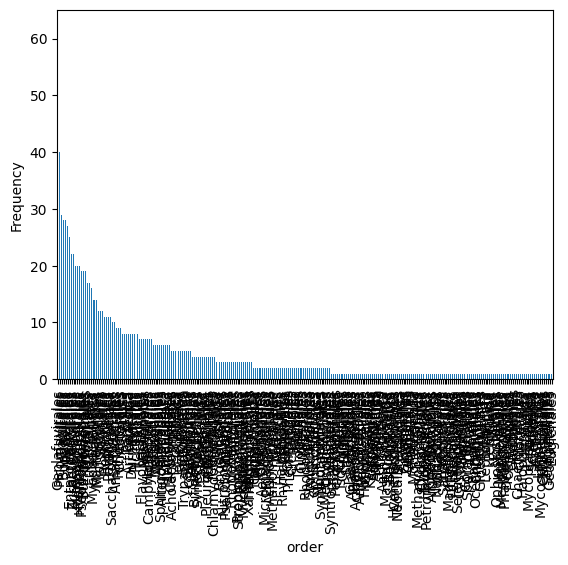

Column: genus
Value Counts:
genus
Begomovirus        54
Streptomyces       20
Betacoronavirus    18
Enterovirus        13
Pseudomonas        11
                   ..
Stanholtvirus       1
Culex               1
Acacia              1
Zeavirus            1
Glandirana          1
Name: count, Length: 721, dtype: int64
Bar plot:


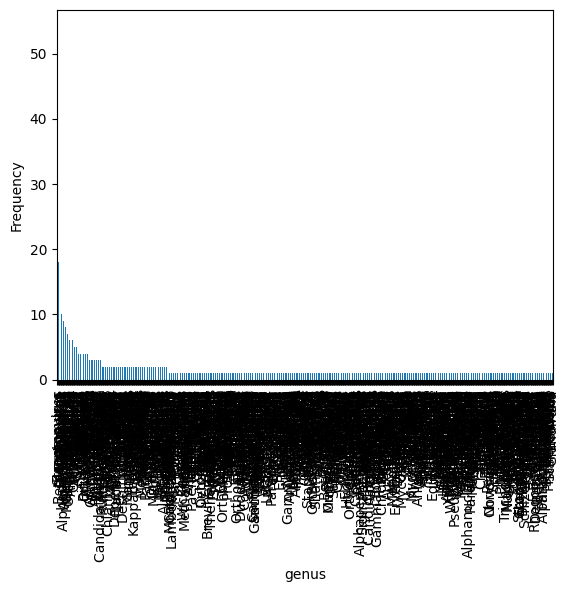

Column: subgenus
Value Counts:
subgenus
Sarbecovirus                      14
Sophophora                         6
Embecovirus                        5
Leishmania                         4
Drosophila                         3
Mus                                3
Trypanozoon                        2
Merbecovirus                       2
Pinus subgen. Pinus                2
Euphorbia subgen. Esula            2
Tegacovirus                        2
Rhipicephalus                      2
Plasmodium (Vinckeia)              1
Bactrocera                         1
Igacovirus                         1
Nobecovirus                        1
Ampobartevirus                     1
Larroussius                        1
Satsumavirus                       1
Eleutherodactylus                  1
Pyromys                            1
Anopheles                          1
Cellia                             1
Phlebotomus                        1
Aspergillus subgen. Nidulantes     1
Rana                               

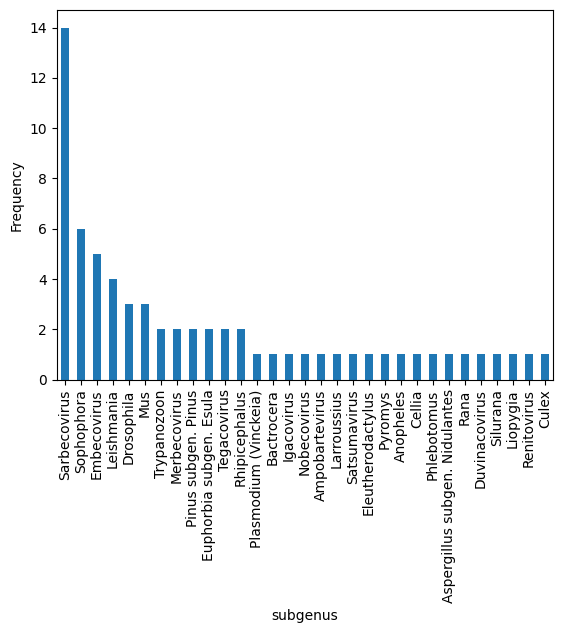

Column: serotype
Value Counts:
serotype
human papillomavirus 18                   1
human papillomavirus 86                   1
Mastomys coucha papillomavirus 2          1
rhinovirus A73                            1
Echovirus E29                             1
H3N2 subtype                              1
Shigella flexneri 5a                      1
Human papillomavirus type 32              1
Echovirus E25                             1
Human adenovirus 44                       1
rhinovirus A94                            1
Human adenovirus 52                       1
human papillomavirus 25                   1
Bos taurus papillomavirus 6               1
Human papillomavirus 9                    1
Rhinovirus B48                            1
Poliovirus 1                              1
Simian adenovirus 25                      1
Enterovirus A71                           1
Human papillomavirus 15                   1
Human papillomavirus 3                    1
Equus caballus papillomavirus 1     

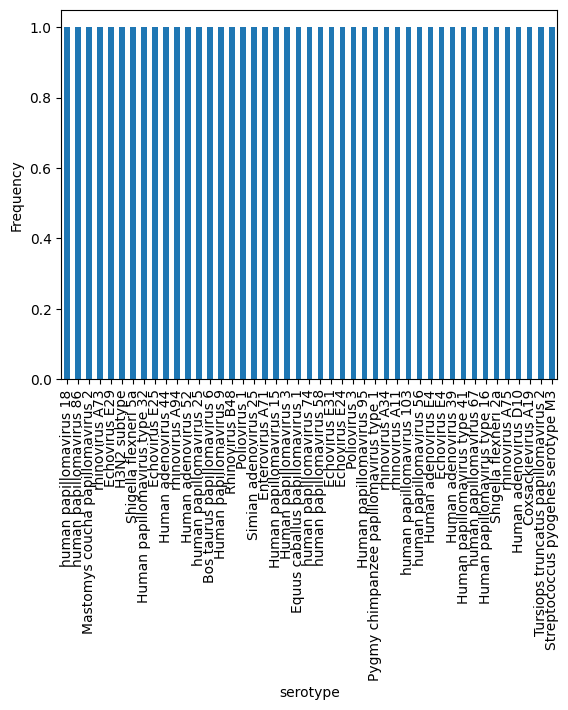

Column: suborder
Value Counts:
suborder
Brachycera           15
Cornidovirineae      12
Pleocyemata          11
Haplorrhini          10
Glossata              8
Ruminantia            6
Apocrita              5
Cyprinoidei           5
Nematocera            5
Pleosporineae         5
Myomorpha             4
Neobatrachia          4
Siluroidei            4
Arnidovirineae        3
Caniformia            3
Sternorrhyncha        3
Cystobacterineae      2
Araneomorphae         2
Tornidovirineae       2
Tetraodontoidei       2
Astrocoeniina         2
Apansporoblastina     2
Polyphaga             2
Tylenchina            2
Hystricomorpha        2
Adephaga              2
Scorpaenoidei         2
Castorimorpha         2
Pleurotineae          2
Whippomorpha          2
Apiineae              2
Sciuromorpha          1
Teloschistineae       1
Pluteineae            1
Hemerobiiformia       1
Marasmiineae          1
Anabantoidei          1
Cystonectae           1
Opisthorchiata        1
Peltigerineae         1


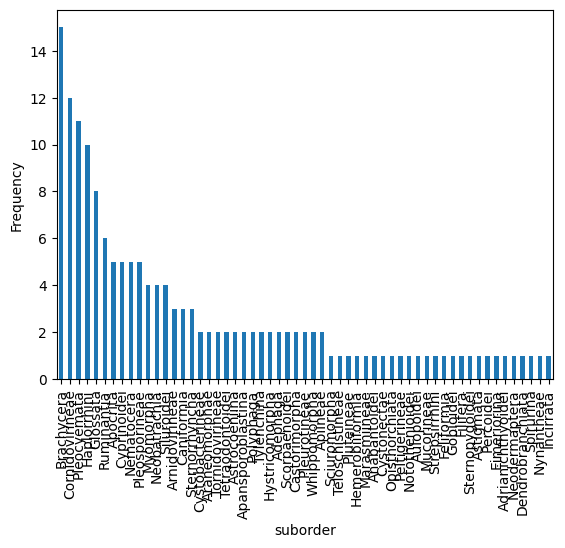

Column: strain
Value Counts:
strain
Sodalis glossinidius str. 'morsitans'                          1
Onion yellows phytoplasma OY-M                                 1
Rhodopirellula baltica SH 1                                    1
Burkholderia thailandensis E264                                1
Francisella tularensis subsp. novicida U112                    1
                                                              ..
Aeromonas salmonicida subsp. salmonicida A449                  1
Francisella tularensis subsp. novicida GA99-3549               1
Pseudomonas aeruginosa UCBPP-PA14                              1
Streptococcus pyogenes MGAS5005                                1
Salmonella enterica subsp. enterica serovar Typhi str. CT18    1
Name: count, Length: 64, dtype: int64
Bar plot:


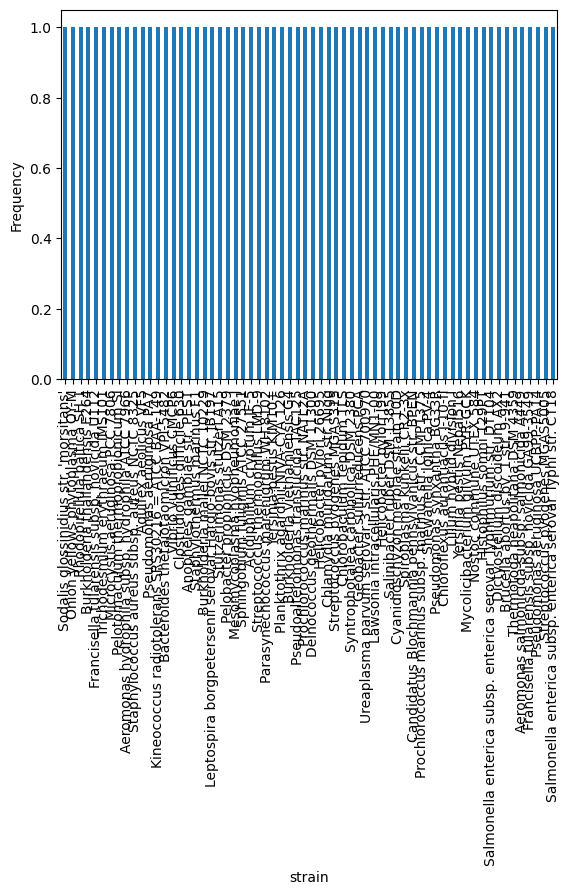

Column: species group
Value Counts:
species group
Bacillus cereus group                            8
melanogaster group                               6
Pseudomonas syringae group                       4
Fusarium oxysporum species complex               4
Xanthomonas citri group                          3
Pseudomonas aeruginosa group                     3
Bacillus subtilis group                          3
Mycobacterium tuberculosis complex               3
Mycobacterium avium complex (MAC)                3
Yersinia pseudotuberculosis complex              3
16SrI (Aster yellows group)                      2
Geobacillus thermoleovorans group                2
Streptomyces violaceusniger group                2
spotted fever group                              2
Leishmania donovani species complex              2
Fusarium sambucinum species complex              2
pseudomallei group                               2
Streptococcus anginosus group                    2
Streptomyces griseus group      

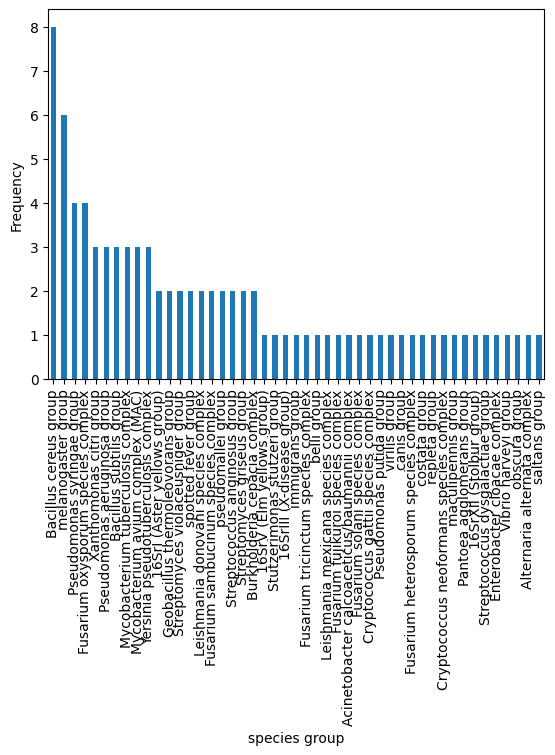

Column: species
Value Counts:
species
Severe acute respiratory syndrome-related coronavirus    12
Norwalk virus                                             7
Salmonella enterica                                       7
Bacillus thuringiensis                                    6
Sinsheimervirus phiX174                                   5
                                                         ..
Mycobacteroides immunogenum                               1
Pimelobacter simplex                                      1
Thermotoga petrophila                                     1
Tomato big bud phytoplasma                                1
Trichostrongylus vitrinus                                 1
Name: count, Length: 1203, dtype: int64
Bar plot:


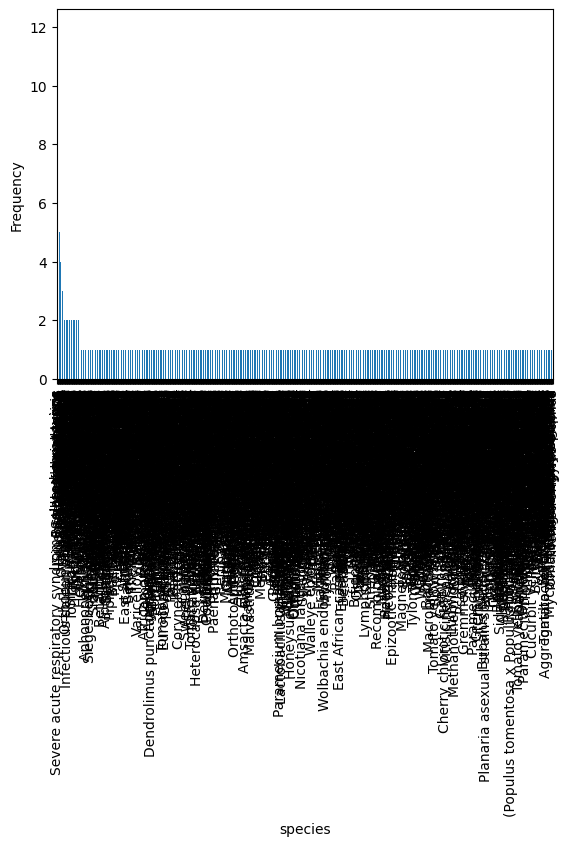

Column: subspecies
Value Counts:
subspecies
Campylobacter jejuni subsp. jejuni                2
Salmonella enterica subsp. enterica               2
Mycoplasma capricolum subsp. capricolum           2
Mycobacteroides abscessus subsp. massiliense      1
Crotalus durissus terrificus                      1
Mycobacteroides abscessus subsp. bolletii         1
Streptomyces peucetius subsp. caesius             1
Pantoea stewartii subsp. stewartii                1
Trypanosoma brucei brucei                         1
Mycobacterium avium subsp. paratuberculosis       1
Crambe hispanica subsp. abyssinica                1
Lactococcus cremoris subsp. cremoris              1
Trypanosoma brucei rhodesiense                    1
Vipera aspis atra                                 1
Leifsonia xyli subsp. xyli                        1
Medicago sativa subsp. falcata                    1
Brassica rapa subsp. rapa                         1
Gloydius brevicaudus siniticus                    1
Rickettsia conorii s

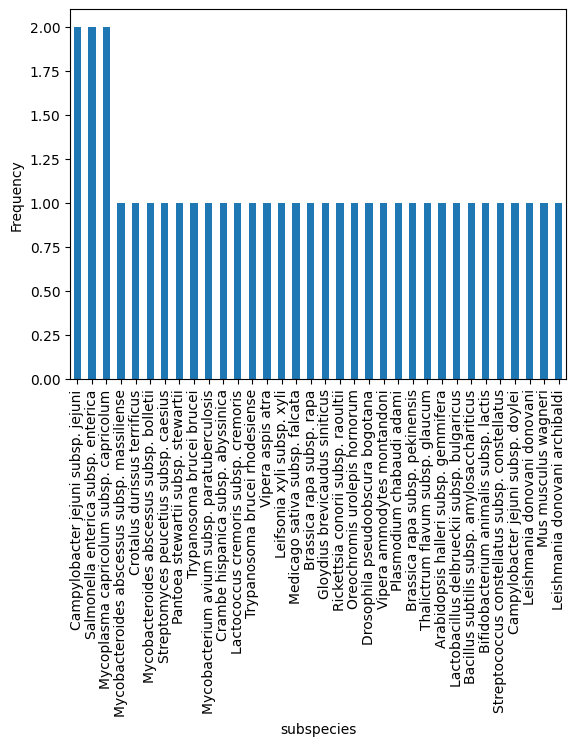

Column: species subgroup
Value Counts:
species subgroup
montium subgroup                          2
melanogaster subgroup                     2
Bacillus amyloliquefaciens group          1
mulleri subgroup                          1
funebris subgroup                         1
Pseudomonas syringae group genomosp. 2    1
Streptomyces griseus subgroup             1
willistoni subgroup                       1
Name: count, dtype: int64
Bar plot:


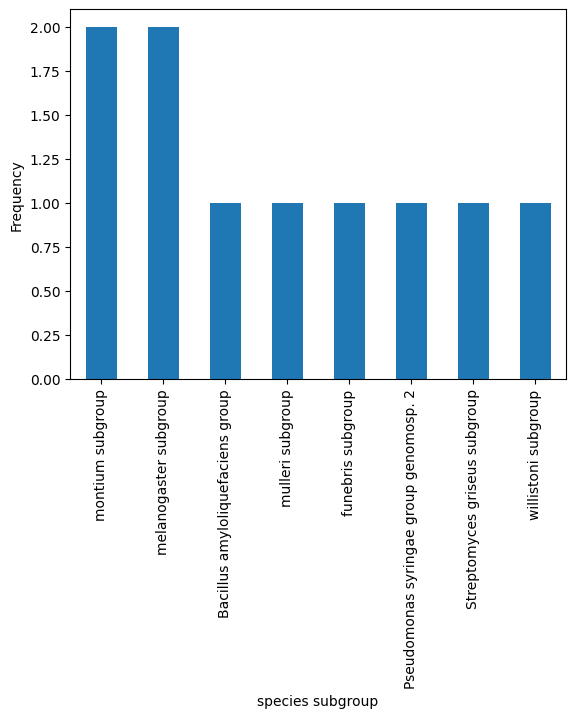

Column: subclass
Value Counts:
subclass
Pterygota                54
Neopterygii              40
Petrosaviidae            26
Hypocreomycetidae        20
Eumalacostraca           10
Eurotiomycetidae         10
Metakinetoplastina       10
Pleosporomycetidae        7
Pinidae                   7
Autobranchia              5
Sordariomycetidae         5
Hexacorallia              4
Caenogastropoda           3
Hydroidolina              3
Agaricomycetidae          3
Euechinoidea              3
Heterobranchia            2
Oscillatoriophycideae     2
Dicranidae                2
Vetigastropoda            2
Echiura                   2
Elasmobranchii            2
Oligochaeta               2
Stichotrichia             2
Digenea                   1
Gnetidae                  1
Zygnematophycidae         1
Eucestoda                 1
Holocephali               1
Lecanoromycetidae         1
Chaetothyriomycetidae     1
Sarsostraca               1
Acari                     1
Bdelloidea                1
Hypotric

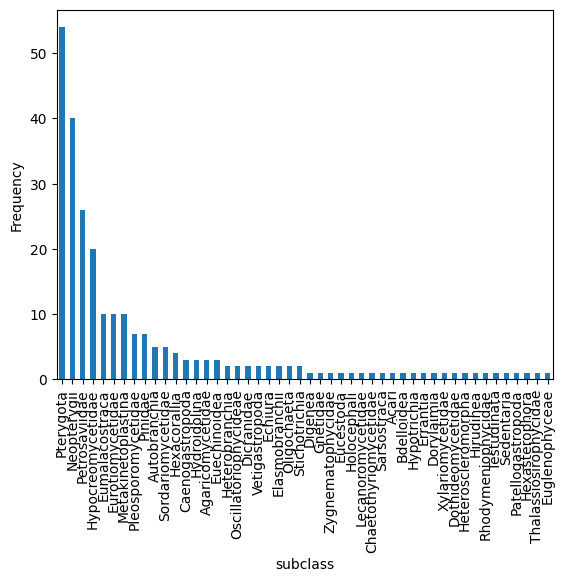

Column: tribe
Value Counts:
tribe
Drosophilini     7
Triticeae        7
Andropogoneae    5
Poeae            4
Phaseoleae       4
                ..
Archipini        1
Mentheae         1
Thlaspideae      1
Bupleureae       1
Trifolieae       1
Name: count, Length: 64, dtype: int64
Bar plot:


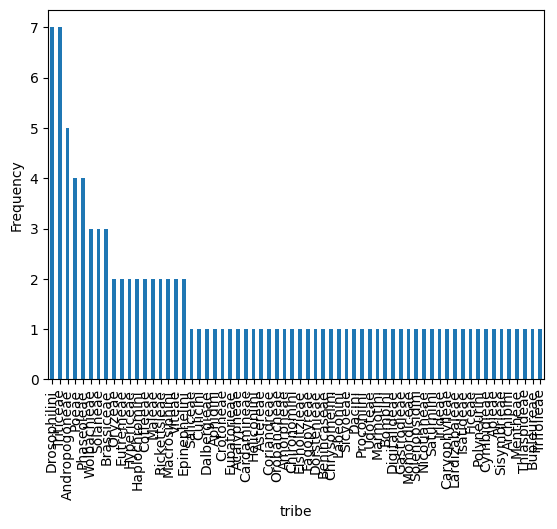

Column: subtribe
Value Counts:
subtribe
Triticinae       5
Oryzinae         3
Hordeinae        2
Aveninae         1
Alopecurinae     1
Agrostidinae     1
Lavandulinae     1
Saccharinae      1
Loliinae         1
Orchidinae       1
Matricariinae    1
Conyzinae        1
Dendrobiinae     1
Name: count, dtype: int64
Bar plot:


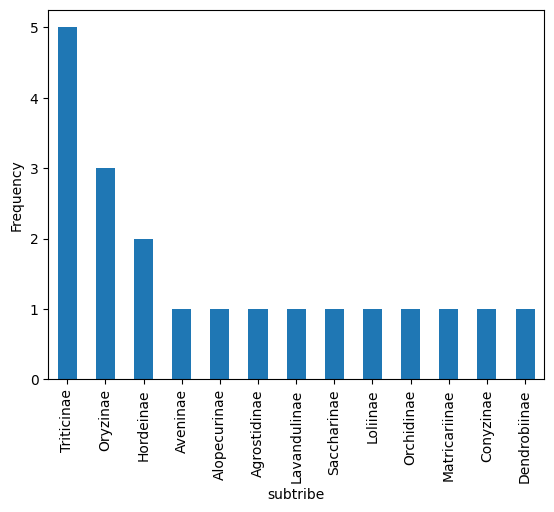

Column: forma specialis
Value Counts:
forma specialis
Fusarium oxysporum f. sp. conglutinans           1
Fusarium oxysporum f. sp. niveum                 1
Fusarium oxysporum f. sp. radicis-lycopersici    1
Fusarium oxysporum f. sp. cucumerinum            1
Name: count, dtype: int64
Bar plot:


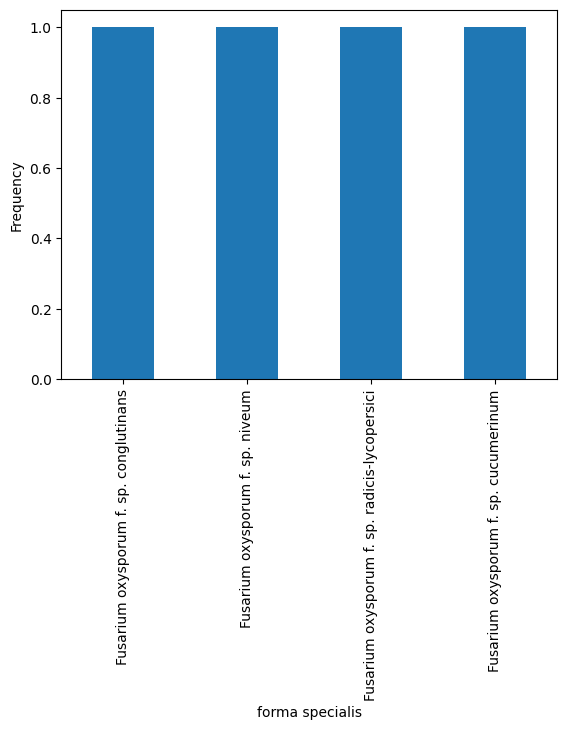

Column: varietas
Value Counts:
varietas
Pyrus pyrifolia var. culta               1
Coptis japonica var. dissecta            1
Vigna radiata var. radiata               1
Rhizopus microsporus var. chinensis      1
Cucumis melo var. inodorus               1
Rhizopus microsporus var. oligosporus    1
Debaryomyces hansenii var. hansenii      1
Name: count, dtype: int64
Bar plot:


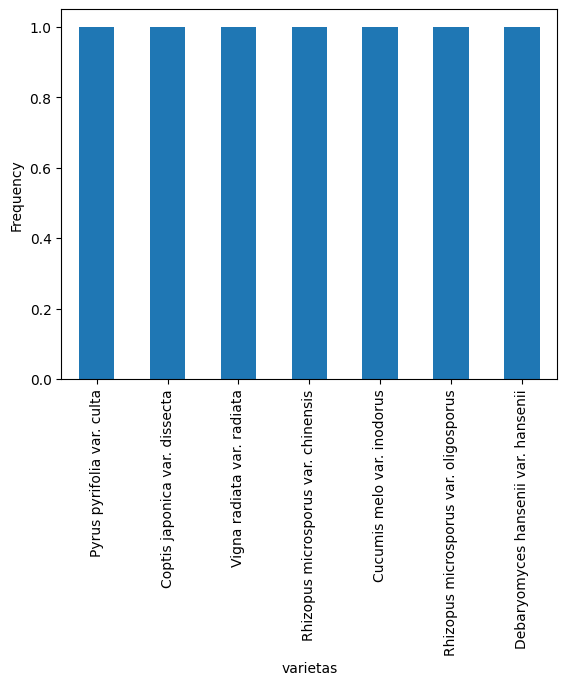

In [16]:
# Univariate analysis for categorical columns
for col in cat_cols:
    print("Column:", col)
    print("Value Counts:")
    print(df[col].value_counts())
    print("Bar plot:")
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


## Handling Null Values
### 100% null rows and columns deleted

In [17]:
# Check for columns with all null values
null_columns = df.columns[df.isnull().sum() == len(df)]
print(null_columns)
# Drop columns with all null values
df.drop(null_columns, axis=1, inplace=True)

# Check for rows with all null values
null_rows = df.loc[df.isnull().sum(axis=1) == len(df.columns)]
print(null_rows)
# Drop rows with all null values
df.drop(null_rows.index, inplace=True)

# Print the DataFrame after dropping null columns and rows
print(list(df.columns))


Index(['superphylum', 'biotype', 'pathogroup', 'series', 'genotype', 'isolate',
       'morph', 'forma', 'subsection'],
      dtype='object')
Empty DataFrame
Columns: [sample_id, dnatype, section, class, infraclass, cohort, superorder, parvorder, infraorder, superclass, subcohort, serogroup, speciesid, ncodons, speciesname, superkingdom, clade, kingdom, subkingdom, family, subfamily, type, uuu, uuc, uua, uug, cuu, cuc, cua, cug, auu, auc, aua, aug, guu, guc, gua, gug, gcu, gcc, gca, gcg, ccu, ccc, cca, ccg, ugg, ggu, ggc, gga, ggg, ucu, ucc, uca, ucg, agu, agc, acu, acc, aca, acg, uau, uac, caa, cag, aau, aac, ugu, ugc, cau, cac, aaa, aag, cgu, cgc, cga, cgg, aga, agg, gau, gac, gaa, gag, uaa, uag, uga, no rank, superfamily, phylum, subphylum, order, genus, subgenus, serotype, suborder, strain, species group, species, subspecies, species subgroup, ...]
Index: []

[0 rows x 105 columns]
['sample_id', 'dnatype', 'section', 'class', 'infraclass', 'cohort', 'superorder', 'parvorder', 'infr

### Checking percentage of missing values in each column

Here we check percentage. After that we gave preview of the dataset, column names, target variable, columns that we dropped for missing values and the missing value percentage report to gemini. We told it to give the feature names that we need to keep based on the importance and percentage. After that we are only keeping those columns with <25% missing values in each column. 

In [18]:
# Calculate and print percentage of missing values for each column
for col in df.columns:
  # Skip index column if it exists
    if col != df.index.name:
        missing_count = df[col].isnull().sum()
        total_count = len(df)
        missing_percent = (missing_count / total_count) * 100
        # print(f"Column: {col} - Missing Values: {missing_percent:.2f}%")
        if missing_percent <= 25:
            # Keep the column (no action needed)
            pass  # Placeholder to indicate keeping the column
        else:
            # Drop the column
            df.drop(col, axis=1, inplace=True)

for col in df.columns:
  # Skip index column if it exists
    if col != df.index.name:
        missing_count = df[col].isnull().sum()
        total_count = len(df)
        missing_percent = (missing_count / total_count) * 100
        print(f"Column: {col} - Missing Values: {missing_percent:.2f}%")

Column: sample_id - Missing Values: 0.00%
Column: dnatype - Missing Values: 18.26%
Column: speciesid - Missing Values: 19.51%
Column: ncodons - Missing Values: 18.85%
Column: speciesname - Missing Values: 19.36%
Column: type - Missing Values: 0.00%
Column: uuu - Missing Values: 18.53%
Column: uuc - Missing Values: 18.00%
Column: uua - Missing Values: 17.70%
Column: uug - Missing Values: 18.52%
Column: cuu - Missing Values: 19.75%
Column: cuc - Missing Values: 19.15%
Column: cua - Missing Values: 16.26%
Column: cug - Missing Values: 18.01%
Column: auu - Missing Values: 17.51%
Column: auc - Missing Values: 16.94%
Column: aua - Missing Values: 19.30%
Column: aug - Missing Values: 16.71%
Column: guu - Missing Values: 18.60%
Column: guc - Missing Values: 18.61%
Column: gua - Missing Values: 17.97%
Column: gug - Missing Values: 20.16%
Column: gcu - Missing Values: 19.17%
Column: gcc - Missing Values: 18.53%
Column: gca - Missing Values: 18.57%
Column: gcg - Missing Values: 17.29%
Column: ccu

### Creating a pipeline for both test and train dataset

In [19]:
all_columns = df.columns
print(list(all_columns))

['sample_id', 'dnatype', 'speciesid', 'ncodons', 'speciesname', 'type', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga']


In [20]:
dff = df[['sample_id', 'dnatype', 'speciesid', 'ncodons', 'type', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga']]

mod_col_nam = ['dnatype']
med_col_nam = ['speciesid', 'ncodons', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga']

print(dff.head())
print(list(dff.columns))
print(list(dff.dtypes))




   sample_id  dnatype  speciesid  ncodons      type      uuu      uuc  \
0     942441      0.0        NaN   4472.0  bacteria  0.00604  0.03086   
1     945052      0.0        NaN   8122.0  bacteria  0.03004  0.01576   
2     942010      0.0        NaN   3270.0     virus      NaN  0.01835   
3     946679      0.0   343496.0      NaN     plant  0.05941      NaN   
4     945046      0.0    47883.0      NaN  bacteria  0.00421  0.02166   

       uua      uug      cuu  ...      cgg      aga      agg      gau  \
0  0.00201  0.01699  0.01073  ...  0.00470  0.00313  0.00291  0.03086   
1      NaN  0.01256  0.01933  ...  0.00111      NaN  0.00098  0.02906   
2      NaN  0.02049  0.01682  ...  0.00398      NaN  0.00948  0.03609   
3  0.03564  0.03564  0.01980  ...  0.00792  0.01436  0.00594  0.02772   
4  0.00000  0.01685  0.00481  ...  0.00542  0.00000  0.00120      NaN   

       gac      gaa      gag      uaa      uag      uga  
0  0.02907  0.02102      NaN      NaN  0.00022  0.00201  
1  0.0

### Handling 'uuu' datatype problem
Here 'uuu' is counting as object type. 

In [21]:
# Check the data type of 'uuu'
current_dtype = dff['uuu'].dtype

if current_dtype == 'object':
    # Check if all values are actually float
    try:
        # Try converting to float to see if there are any errors
        dff['uuu'] = pd.to_numeric(dff['uuu'])
    except ValueError:
        print("Error: Not all values in 'uuu' are convertible to float.")
    else:
        # Conversion successful, update data type if necessary
        new_dtype = dff['uuu'].dtype
        if new_dtype == 'float64':
            print("Data type of 'uuu' successfully converted to float64.")
        else:
            print(f"'uuu' converted to numeric, but data type is {new_dtype}.")
else:
    print(f"'uuu' already has data type {current_dtype}.")


Error: Not all values in 'uuu' are convertible to float.


In [22]:
# Remove leading/trailing whitespaces from 'uuu'
dff['uuu'] = dff['uuu'].str.strip()

# Try converting 'uuu' to float, handle potential errors
try:
    # Attempt conversion
    dff['uuu'] = pd.to_numeric(dff['uuu'])
    print("Data type of 'uuu' successfully converted to float64.")
except ValueError:
    print("Error: Not all values in 'uuu' are convertible to float after removing whitespaces.")

# Optional: Explore remaining non-numeric values (if any)
# You can add additional logic here to handle these values (e.g., imputation, removal)
non_numeric_rows = dff[dff['uuu'].notna() & dff['uuu'].astype(str).str.isnumeric() == False]
if not non_numeric_rows.empty:
    print(f"There are still {len(non_numeric_rows)} rows with non-numeric values after whitespace removal:")
    print(non_numeric_rows)  # Display rows with non-numeric values


Error: Not all values in 'uuu' are convertible to float after removing whitespaces.
There are still 9730 rows with non-numeric values after whitespace removal:
      sample_id  dnatype  speciesid  ncodons          type      uuu      uuc  \
0        942441      0.0        NaN   4472.0      bacteria  0.00604  0.03086   
1        945052      0.0        NaN   8122.0      bacteria  0.03004  0.01576   
2        942010      0.0        NaN   3270.0         virus      NaN  0.01835   
3        946679      0.0   343496.0      NaN         plant  0.05941      NaN   
4        945046      0.0    47883.0      NaN      bacteria  0.00421  0.02166   
...         ...      ...        ...      ...           ...      ...      ...   
9766     948155      2.0    98897.0   1418.0         plant      NaN  0.02327   
9767     949342      0.0        NaN  43315.0  invertebrate      NaN  0.01902   
9768     950383      1.0        NaN   2654.0    vertebrate      NaN  0.00641   
9769     943565      0.0   191677.0   11

```python
# After removing whitespaces...
numeric_values = dff['uuu'].dropna().astype(float)  # Get existing numeric values
mean_value = numeric_values.mean()  # Calculate the mean
dff['uuu'] = dff['uuu'].fillna(mean_value)  # Impute missing values with the mean
try:
    dff['uuu'] = pd.to_numeric(dff['uuu'])
    print("Data type of 'uuu' successfully converted to float64.")
except ValueError:
    print("There are still non-numeric values in 'uuu' after imputation.")
```
The error "ValueError: could not convert string to float: '12;I'" indicates you're encountering strings with a semicolon (';') and potentially another character ('I') in the 'uuu' column, preventing conversion to float during imputation with the mean. 

In [23]:
dff.loc[dff['uuu'] == '12;I', 'uuu'] = 0

try:
    dff['uuu'] = pd.to_numeric(dff['uuu'])
    print("Data type of 'uuu' successfully converted to float64.")
except ValueError:
    print("There are still non-numeric values in 'uuu' after handling categories.")

Data type of 'uuu' successfully converted to float64.


### Imputing Missing Value 
After doing exploratory data analysis, we understood that all the feature with float datatype are skewed. Since the data distribution of float columns are skewed we will handle null values of numerical data with median imputation and categorical null values mod imputation

In [24]:
# Iterate through columns and impute NaNs with mean using update
for col in med_col_nam:
    nedian = dff[col].median()
    dff.update(dff[col].fillna(nedian))
    
for col in mod_col_nam:
    if dff[col].dtype == 'float64':
        # Mode imputation for float column (dnatype)
        mode_value = dff[col].mode().iloc[0]
        dff.update({col: dff[col].fillna(mode_value)})  # Update inplace using update
    elif dff[col].dtype == 'object':
        # Mode imputation for object column (speciesname) - Most frequent string
        mode_value = dff[col].mode().iloc[0]
        dff.update({col: dff[col].fillna(mode_value)})  # Update inplace using update
    else:
        # Handle other data types (optional)
        print(f"Warning: Column '{col}' has data type '{dff[col].dtype}'. Mode imputation might not be suitable.")


dff.head()

sample_id  dnatype  speciesid  ncodons      type      uuu      uuc  \
0     942441      0.0    83556.0   4472.0  bacteria  0.00604  0.03086   
1     945052      0.0    83556.0   8122.0  bacteria  0.03004  0.01576   
2     942010      0.0    83556.0   3270.0     virus  0.02178  0.01835   
3     946679      0.0   343496.0   2905.0     plant  0.05941  0.02170   
4     945046      0.0    47883.0   2905.0  bacteria  0.00421  0.02166   

        uua      uug      cuu  ...      cgg      aga      agg      gau  \
0  0.002010  0.01699  0.01073  ...  0.00470  0.00313  0.00291  0.03086   
1  0.015415  0.01256  0.01933  ...  0.00111  0.00954  0.00098  0.02906   
2  0.015415  0.02049  0.01682  ...  0.00398  0.00954  0.00948  0.03609   
3  0.035640  0.03564  0.01980  ...  0.00792  0.01436  0.00594  0.02772   
4  0.000000  0.01685  0.00481  ...  0.00542  0.00000  0.00120  0.02549   

       gac       gaa       gag      uaa      uag      uga  
0  0.02907  0.021020  0.020485  0.00135  0.00022  0.00201  
1  0.01761  0.026065  0.010710  0.00222  0.00042  0.00012  
2  0.01774  0.047710  0.024160  0.00000  0.00031  0.00000  
3  0.01911  0.039600  0.020485  0.00000  0.00000  0.00198  
4  0.03610  0.026065  0.029480  0.00060  0.00000  0.00241  

[5 rows x 69 columns]

In [25]:
print(list(dff.columns))

['sample_id', 'dnatype', 'speciesid', 'ncodons', 'type', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga']


<Axes: >

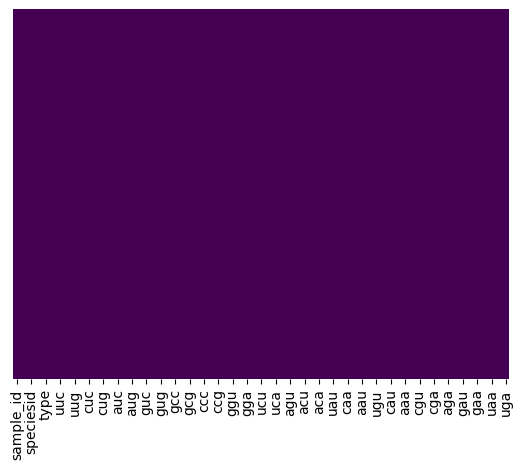

In [26]:
sns.heatmap(dff.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Encoding Categorical Value
One Hot Encoding for "dnatype" feature to encode this categorical variable

In [27]:
# One-hot encode the 'dnatype' column
dummies = pd.get_dummies(dff['dnatype'], prefix='dnatype_')
dff = pd.concat([dff, dummies], axis=1)
dff.drop('dnatype', axis=1, inplace=True)  # Optional: Remove the original column

# Print the DataFrame after encoding
dff.head()

sample_id  speciesid  ncodons      type      uuu      uuc       uua  \
0     942441    83556.0   4472.0  bacteria  0.00604  0.03086  0.002010   
1     945052    83556.0   8122.0  bacteria  0.03004  0.01576  0.015415   
2     942010    83556.0   3270.0     virus  0.02178  0.01835  0.015415   
3     946679   343496.0   2905.0     plant  0.05941  0.02170  0.035640   
4     945046    47883.0   2905.0  bacteria  0.00421  0.02166  0.000000   

       uug      cuu      cuc  ...      uag      uga  dnatype__0.0  \
0  0.01699  0.01073  0.02549  ...  0.00022  0.00201          True   
1  0.01256  0.01933  0.00603  ...  0.00042  0.00012          True   
2  0.02049  0.01682  0.00887  ...  0.00031  0.00000          True   
3  0.03564  0.01980  0.01431  ...  0.00000  0.00198          True   
4  0.01685  0.00481  0.01431  ...  0.00000  0.00241          True   

   dnatype__1.0  dnatype__2.0  dnatype__4.0  dnatype__5.0  dnatype__9.0  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   dnatype__11.0  dnatype__12.0  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 76 columns]

word order and semantic relationships are important hence the speciesname needs word embeddings.

Preprocess Text (Optional):
* Text preprocessing can improve the quality of word embeddings. Consider techniques like:
* Lowercasing text
* Removing punctuation
* Tokenizing words

Create Word2Vec Model

Encode Species Names



```python
from gensim.models import Word2Vec
import re

# Preprocessing
# Assuming dff['speciesname'] contains text data
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()  # Tokenize words

dff['speciesname_processed'] = dff['speciesname'].apply(preprocess_text)


# Define training parameters (adjust as needed)
sentences = dff['speciesname_processed'].tolist()  # List of lists (each sublist is a sentence)
embedding_dim = 100  # Dimensionality of word vectors
model = Word2Vec(sentences, min_count=1, vector_size=embedding_dim)  # Use vector_size instead of size



# Encoding
def get_word_embedding(word, model):
    try:
        return model.wv[word]
    except KeyError:
        # Handle out-of-vocabulary (OOV) words (optional)
        return np.zeros(embedding_dim)  # Zero vector for OOV words

species_embeddings = [get_word_embedding(word[0], model) for word in dff['speciesname_processed']]  # Assuming first word in processed sentence represents the species name

# Add embeddings as a new column or use them for further analysis
dff['speciesname_embedding'] = species_embeddings

dff.drop(['speciesname', 'speciesname_processed'], axis=1, inplace=True)

dff.head()
```

Since "type" is an object column containing categories, label encoding is a suitable approach. 

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'type' column
dff['type_encoded'] = le.fit_transform(dff['type'])

dff.head()

sample_id  speciesid  ncodons      type      uuu      uuc       uua  \
0     942441    83556.0   4472.0  bacteria  0.00604  0.03086  0.002010   
1     945052    83556.0   8122.0  bacteria  0.03004  0.01576  0.015415   
2     942010    83556.0   3270.0     virus  0.02178  0.01835  0.015415   
3     946679   343496.0   2905.0     plant  0.05941  0.02170  0.035640   
4     945046    47883.0   2905.0  bacteria  0.00421  0.02166  0.000000   

       uug      cuu      cuc  ...      uga  dnatype__0.0  dnatype__1.0  \
0  0.01699  0.01073  0.02549  ...  0.00201          True         False   
1  0.01256  0.01933  0.00603  ...  0.00012          True         False   
2  0.02049  0.01682  0.00887  ...  0.00000          True         False   
3  0.03564  0.01980  0.01431  ...  0.00198          True         False   
4  0.01685  0.00481  0.01431  ...  0.00241          True         False   

   dnatype__2.0  dnatype__4.0  dnatype__5.0  dnatype__9.0  dnatype__11.0  \
0         False         False         False         False          False   
1         False         False         False         False          False   
2         False         False         False         False          False   
3         False         False         False         False          False   
4         False         False         False         False          False   

   dnatype__12.0  type_encoded  
0          False             1  
1          False             1  
2          False            10  
3          False             5  
4          False             1  

[5 rows x 77 columns]

dnatype__0.0 to dnatype12.0 features need to be added. Hence those that are missing should be added with false values

In [29]:
columns_to_add = ['dnatype__0.0', 'dnatype__1.0', 'dnatype__2.0',  'dnatype__3.0',  'dnatype__4.0',  'dnatype__5.0',  'dnatype__6.0', 'dnatype__7.0', 'dnatype__8.0', 'dnatype__9.0', 'dnatype__10.0', 'dnatype__11.0', 'dnatype__12.0']
def add_missing_dnatype_columns(dff, columns_to_add):
    """
    Checks for missing 'dnatype' columns in a DataFrame and adds them with all False values.

    Args:
      dff (pd.DataFrame): The DataFrame to check and modify.
      columns_to_add (list): A list containing the expected 'dnatype' column names.

    Returns:
      pd.DataFrame: The modified DataFrame with all 'dnatype' columns present.
    """
    missing_columns = [col for col in columns_to_add if col not in dff.columns]
    if missing_columns:
        for col in missing_columns:
            dff[col] = False
    return dff

# Apply the function
dff = add_missing_dnatype_columns(dff.copy(), columns_to_add)
print(list(dff.columns))

['sample_id', 'speciesid', 'ncodons', 'type', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga', 'dnatype__0.0', 'dnatype__1.0', 'dnatype__2.0', 'dnatype__4.0', 'dnatype__5.0', 'dnatype__9.0', 'dnatype__11.0', 'dnatype__12.0', 'type_encoded', 'dnatype__3.0', 'dnatype__6.0', 'dnatype__7.0', 'dnatype__8.0', 'dnatype__10.0']


# Test Data Preparation

In [30]:
test_df = pd.read_csv('/kaggle/input/codon-usage-dataset-partially-cleaned/dna_test - dna_test.csv.csv')
test_df.head()

sample_id  dnatype section class infraclass cohort superorder parvorder  \
0     951792      1.0     NaN   NaN        NaN    NaN        NaN       NaN   
1     946742      2.0     NaN   NaN        NaN    NaN        NaN       NaN   
2     942792      0.0     NaN   NaN        NaN    NaN        NaN       NaN   
3     943129      NaN     NaN   NaN        NaN    NaN        NaN       NaN   
4     942363      NaN     NaN   NaN        NaN    NaN        NaN       NaN   

  infraorder superclass  ...  subspecies species subgroup subclass tribe  \
0        NaN        NaN  ...         NaN              NaN      NaN   NaN   
1        NaN        NaN  ...         NaN              NaN      NaN   NaN   
2        NaN        NaN  ...         NaN              NaN      NaN   NaN   
3        NaN        NaN  ...         NaN              NaN      NaN   NaN   
4        NaN        NaN  ...         NaN              NaN      NaN   NaN   

   subtribe  morph  forma  subsection forma specialis varietas  
0       NaN    NaN    NaN         NaN             NaN      NaN  
1       NaN    NaN    NaN         NaN             NaN      NaN  
2       NaN    NaN    NaN         NaN             NaN      NaN  
3       NaN    NaN    NaN         NaN             NaN      NaN  
4       NaN    NaN    NaN         NaN             NaN      NaN  

[5 rows x 113 columns]

In [31]:
test_df.shape

(3257, 113)

In [32]:
print(list(test_df.dtypes))

[dtype('int64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('floa

In [33]:
test_df = test_df.drop_duplicates()
test_df.replace('', np.nan, inplace=True)

# Check for columns with all null values
null_columns = test_df.columns[test_df.isnull().sum() == len(test_df)]
print(null_columns)
# Drop columns with all null values
test_df.drop(null_columns, axis=1, inplace=True)

# Check for rows with all null values
null_rows = test_df.loc[test_df.isnull().sum(axis=1) == len(test_df.columns)]
print(null_rows)
# Drop rows with all null values
test_df.drop(null_rows.index, inplace=True)

# Print the DataFrame after dropping null columns and rows
print(list(test_df.columns))

Index(['superphylum', 'pathogroup', 'series', 'genotype', 'morph', 'forma',
       'subsection', 'forma specialis'],
      dtype='object')
Empty DataFrame
Columns: [sample_id, dnatype, section, class, infraclass, cohort, superorder, parvorder, infraorder, superclass, subcohort, serogroup, biotype, speciesid, ncodons, speciesname, superkingdom, clade, kingdom, subkingdom, family, subfamily, uuu, uuc, uua, uug, cuu, cuc, cua, cug, auu, auc, aua, aug, guu, guc, gua, gug, gcu, gcc, gca, gcg, ccu, ccc, cca, ccg, ugg, ggu, ggc, gga, ggg, ucu, ucc, uca, ucg, agu, agc, acu, acc, aca, acg, uau, uac, caa, cag, aau, aac, ugu, ugc, cau, cac, aaa, aag, cgu, cgc, cga, cgg, aga, agg, gau, gac, gaa, gag, uaa, uag, uga, no rank, superfamily, phylum, subphylum, order, genus, subgenus, serotype, suborder, isolate, strain, species group, species, subspecies, ...]
Index: []

[0 rows x 105 columns]
['sample_id', 'dnatype', 'section', 'class', 'infraclass', 'cohort', 'superorder', 'parvorder', 'infraorder', 

In [34]:
test_dff = test_df[['sample_id', 'dnatype', 'speciesid', 'ncodons', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga']]
print(test_dff.head())
print(list(test_dff.columns))
print(list(test_dff.dtypes))

   sample_id  dnatype  speciesid  ncodons      uuu      uuc      uua      uug  \
0     951792      1.0        NaN   3142.0  0.02005  0.03883  0.02546  0.00127   
1     946742      2.0     3562.0      NaN  0.03535  0.01840  0.03004  0.02072   
2     942792      0.0    35241.0      NaN  0.03103  0.01218  0.02730  0.01396   
3     943129      NaN     1299.0   9862.0  0.00902      NaN  0.00041  0.00710   
4     942363      NaN   103216.0  11936.0      NaN  0.01307  0.01098  0.00737   

       cuu      cuc  ...      cgg      aga      agg      gau      gac  \
0  0.01464  0.02037  ...  0.00064  0.00032  0.00000  0.00509  0.01209   
1  0.02362  0.00769  ...  0.00429      NaN  0.00763  0.03215      NaN   
2  0.01841  0.00525  ...  0.00160      NaN  0.00267  0.04144  0.01823   
3  0.00436  0.03387  ...  0.01876  0.00203  0.00314  0.00507  0.04796   
4  0.01198  0.01123  ...  0.00712  0.00503      NaN  0.02823  0.02840   

       gaa      gag      uaa      uag      uga  
0  0.02005  0.00255  0.00

In [35]:
# Iterate through columns and impute NaNs with mean using update
for col in med_col_nam:
    median = test_dff[col].median()
    test_dff.update(test_dff[col].fillna(median))
    
for col in mod_col_nam:
    if test_dff[col].dtype == 'float64':
        # Mode imputation for float column (dnatype)
        mode_value = test_dff[col].mode().iloc[0]
        test_dff.update({col: test_dff[col].fillna(mode_value)})  # Update inplace using update
    elif test_dff[col].dtype == 'object':
        # Mode imputation for object column (speciesname) - Most frequent string
        mode_value = test_dff[col].mode().iloc[0]
        test_dff.update({col: test_dff[col].fillna(mode_value)})  # Update inplace using update
    else:
        # Handle other data types (optional)
        print(f"Warning: Column '{col}' has data type '{test_dff[col].dtype}'. Mode imputation might not be suitable.")


test_dff.head()

sample_id  dnatype  speciesid  ncodons       uuu      uuc      uua  \
0     951792      1.0    82639.0   3142.0  0.020050  0.03883  0.02546   
1     946742      2.0     3562.0   2918.5  0.035350  0.01840  0.03004   
2     942792      0.0    35241.0   2918.5  0.031030  0.01218  0.02730   
3     943129      0.0     1299.0   9862.0  0.009020  0.02193  0.00041   
4     942363      0.0   103216.0  11936.0  0.021555  0.01307  0.01098   

       uug      cuu      cuc  ...      cgg       aga      agg      gau  \
0  0.00127  0.01464  0.02037  ...  0.00064  0.000320  0.00000  0.00509   
1  0.02072  0.02362  0.00769  ...  0.00429  0.008975  0.00763  0.03215   
2  0.01396  0.01841  0.00525  ...  0.00160  0.008975  0.00267  0.04144   
3  0.00710  0.00436  0.03387  ...  0.01876  0.002030  0.00314  0.00507   
4  0.00737  0.01198  0.01123  ...  0.00712  0.005030  0.00440  0.02823   

        gac      gaa      gag       uaa      uag      uga  
0  0.012090  0.02005  0.00255  0.001910  0.00095  0.02514  
1  0.019175  0.03989  0.01648  0.001395  0.00081  0.00097  
2  0.018230  0.05824  0.01396  0.002400  0.00133  0.00109  
3  0.047960  0.02606  0.02037  0.000810  0.00041  0.00162  
4  0.028400  0.03594  0.02849  0.002010  0.00017  0.00218  

[5 rows x 68 columns]

<Axes: >

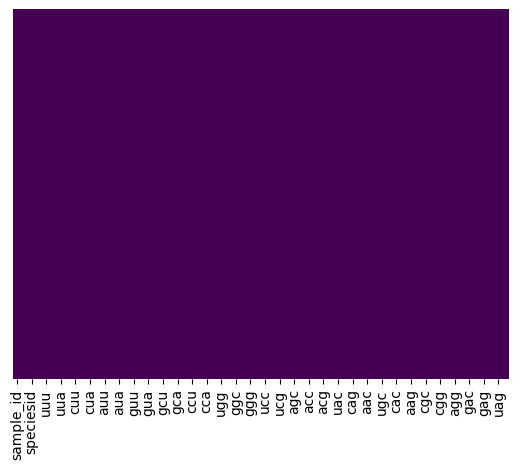

In [36]:
sns.heatmap(test_dff.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
# One-hot encode the 'dnatype' column
dummies = pd.get_dummies(test_dff['dnatype'], prefix='dnatype_')
test_dff = pd.concat([test_dff, dummies], axis=1)
test_dff.drop('dnatype', axis=1, inplace=True)  # Optional: Remove the original column

# Print the DataFrame after encoding
test_dff.head()

sample_id  speciesid  ncodons       uuu      uuc      uua      uug  \
0     951792    82639.0   3142.0  0.020050  0.03883  0.02546  0.00127   
1     946742     3562.0   2918.5  0.035350  0.01840  0.03004  0.02072   
2     942792    35241.0   2918.5  0.031030  0.01218  0.02730  0.01396   
3     943129     1299.0   9862.0  0.009020  0.02193  0.00041  0.00710   
4     942363   103216.0  11936.0  0.021555  0.01307  0.01098  0.00737   

       cuu      cuc      cua  ...      gag       uaa      uag      uga  \
0  0.01464  0.02037  0.08243  ...  0.00255  0.001910  0.00095  0.02514   
1  0.02362  0.00769  0.01379  ...  0.01648  0.001395  0.00081  0.00097   
2  0.01841  0.00525  0.00898  ...  0.01396  0.002400  0.00133  0.00109   
3  0.00436  0.03387  0.00172  ...  0.02037  0.000810  0.00041  0.00162   
4  0.01198  0.01123  0.00343  ...  0.02849  0.002010  0.00017  0.00218   

   dnatype__0.0  dnatype__1.0  dnatype__2.0  dnatype__3.0  dnatype__4.0  \
0         False          True         False         False         False   
1         False         False          True         False         False   
2          True         False         False         False         False   
3          True         False         False         False         False   
4          True         False         False         False         False   

   dnatype__7.0  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 73 columns]

In [38]:
# Apply the function
test_dff = add_missing_dnatype_columns(test_dff.copy(), columns_to_add)

test_dff.head()

sample_id  speciesid  ncodons       uuu      uuc      uua      uug  \
0     951792    82639.0   3142.0  0.020050  0.03883  0.02546  0.00127   
1     946742     3562.0   2918.5  0.035350  0.01840  0.03004  0.02072   
2     942792    35241.0   2918.5  0.031030  0.01218  0.02730  0.01396   
3     943129     1299.0   9862.0  0.009020  0.02193  0.00041  0.00710   
4     942363   103216.0  11936.0  0.021555  0.01307  0.01098  0.00737   

       cuu      cuc      cua  ...  dnatype__3.0  dnatype__4.0  dnatype__7.0  \
0  0.01464  0.02037  0.08243  ...         False         False         False   
1  0.02362  0.00769  0.01379  ...         False         False         False   
2  0.01841  0.00525  0.00898  ...         False         False         False   
3  0.00436  0.03387  0.00172  ...         False         False         False   
4  0.01198  0.01123  0.00343  ...         False         False         False   

   dnatype__5.0  dnatype__6.0  dnatype__8.0  dnatype__9.0  dnatype__10.0  \
0         False         False         False         False          False   
1         False         False         False         False          False   
2         False         False         False         False          False   
3         False         False         False         False          False   
4         False         False         False         False          False   

   dnatype__11.0  dnatype__12.0  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 80 columns]

# Model Training

In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
X = dff.drop(['sample_id', 'type', 'type_encoded'], axis=1)  # Drop two columns using a list
Y = dff['type_encoded']

Test_X = test_dff[['speciesid', 'ncodons', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga', 'dnatype__0.0', 'dnatype__1.0', 'dnatype__2.0', 'dnatype__4.0', 'dnatype__5.0', 'dnatype__9.0', 'dnatype__11.0', 'dnatype__12.0', 'dnatype__3.0', 'dnatype__6.0', 'dnatype__7.0', 'dnatype__8.0', 'dnatype__10.0']]
print(list(Test_X.columns))
print(list(X.columns))

['speciesid', 'ncodons', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa', 'cag', 'aau', 'aac', 'ugu', 'ugc', 'cau', 'cac', 'aaa', 'aag', 'cgu', 'cgc', 'cga', 'cgg', 'aga', 'agg', 'gau', 'gac', 'gaa', 'gag', 'uaa', 'uag', 'uga', 'dnatype__0.0', 'dnatype__1.0', 'dnatype__2.0', 'dnatype__4.0', 'dnatype__5.0', 'dnatype__9.0', 'dnatype__11.0', 'dnatype__12.0', 'dnatype__3.0', 'dnatype__6.0', 'dnatype__7.0', 'dnatype__8.0', 'dnatype__10.0']
['speciesid', 'ncodons', 'uuu', 'uuc', 'uua', 'uug', 'cuu', 'cuc', 'cua', 'cug', 'auu', 'auc', 'aua', 'aug', 'guu', 'guc', 'gua', 'gug', 'gcu', 'gcc', 'gca', 'gcg', 'ccu', 'ccc', 'cca', 'ccg', 'ugg', 'ggu', 'ggc', 'gga', 'ggg', 'ucu', 'ucc', 'uca', 'ucg', 'agu', 'agc', 'acu', 'acc', 'aca', 'acg', 'uau', 'uac', 'caa

In [41]:
# Assuming dff is your DataFrame with features and 'type_encoded' for classification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
# Define and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')  # Weighted precision for multi-class
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')  # Weighted recall for multi-class
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')  # Weighted F1-score for multi-class

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")


Random Forest Results:
Accuracy: 0.8399
Precision: 0.8468
Recall: 0.8399
F1-Score: 0.8252


In [43]:
# Define and train XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', n_estimators=100, random_state=42)  # Adjust parameters as needed
xgb_model.fit(X_train, y_train)

# Make predictions on test data
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_y_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_y_pred, average='weighted')

print("\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")



XGBoost Results:
Accuracy: 0.8910
Precision: 0.8899
Recall: 0.8910
F1-Score: 0.8865


In [44]:
print(dff['type'].unique())
print(dff['type_encoded'].unique())

['bacteria' 'virus' 'plant' 'bacteriophage' 'mammal' 'vertebrate'
 'invertebrate' 'rodent' 'archaea' 'primate' 'plasmid']
[ 1 10  5  2  4  9  3  8  0  7  6]


In [45]:
r_mod = RandomForestClassifier(n_estimators=100, random_state=42)
x_mod = XGBClassifier(objective='multi:softmax', n_estimators=100, random_state=42)

r_mod.fit(X,Y)
x_mod.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [46]:
# Assuming le is the LabelEncoder object used for encoding
predicted_labels = r_mod.predict(Test_X)  # Get model predictions on encoded data
decoded_labels = le.inverse_transform(predicted_labels)  # Decode predictions
decoded_labels
# decoded_labels now contains the original category labels for the test data
# Create a new DataFrame
new_df = pd.DataFrame({'sample_id': test_dff['sample_id'], 'type': decoded_labels})

# Save the DataFrame as a CSV file
new_df.to_csv('submission3.csv', index=False)  # Adjust filename as needed

print("CSV file created successfully!")

CSV file created successfully!


In [47]:
# Assuming le is the LabelEncoder object used for encoding
predicted_labels = x_mod.predict(Test_X)  # Get model predictions on encoded data
decoded_labels = le.inverse_transform(predicted_labels)  # Decode predictions
decoded_labels
# decoded_labels now contains the original category labels for the test data
# Create a new DataFrame
new_df = pd.DataFrame({'sample_id': test_dff['sample_id'], 'type': decoded_labels})

# Save the DataFrame as a CSV file
new_df.to_csv('submission4.csv', index=False)  # Adjust filename as needed

print("CSV file created successfully!")

CSV file created successfully!


In [48]:
# Create an XGBoost model with early stopping to prevent overfitting
xm = XGBClassifier(objective='multi:softmax', n_estimators=500, learning_rate = 0.5, random_state=42)


# Fit the grid search to the training data
xm.fit(X,Y)
# Assuming le is the LabelEncoder object used for encoding
predicted_labels = xm.predict(Test_X)  # Get model predictions on encoded data
decoded_labels = le.inverse_transform(predicted_labels)  # Decode predictions
decoded_labels
# decoded_labels now contains the original category labels for the test data
# Create a new DataFrame
new_df = pd.DataFrame({'sample_id': test_dff['sample_id'], 'type': decoded_labels})

# Save the DataFrame as a CSV file
new_df.to_csv('submission5.csv', index=False)  # Adjust filename as needed

print("CSV file created successfully!")

CSV file created successfully!
